In [278]:
## **Internship on Data Science and Analytics| Project 2**
## **Internship on Data Science and Analytics| Project 2**


## **Internship on Data Science and Analytics| Project 2**
# **Customer Segmentation for Marketing Strategy**

In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering


# **1. Under standing the problem**

 A dataset is given,containing details of marketing campaigns done via phone with various details for customers such as demographics, last campaign details etc. It is rquired to predict accurately whether the customer will subscribe to the focus product for the campaign - Term
Deposit after the campaign?

Data Description
1. id-Customer Id

2. customer_age-(discrete numeric)

3. job_type(categorical-blue-collar,management ,technician, admin. ,services, retired,self-employed, entrepreneur ,unemployed,
housemaid , student, unknown

4. marital(categorical-married, single,divorced )

5. education(categorical-secondary ,tertiary,
primary ,unknown )

6. default-(binary -yes or no)

7. balance-(continuos numeric)

8. housing_loan(binary-yes or no)

9. personal_loan(binary -yes or no)

10. communication_type(categorical-cellular,    unknown,telephone)

11. day_of_month(numeric)

12. month(categorical)

13. last_contact_duration(continuous numeric)

14. num_contacts_in_campaign(integer)

15. days_since_prev_campaign_contact(unknown,
failure,other,success)

16. num_contacts_prev_campaign(integer)

17. prev_campaign_outcome	(yes or No)

18. term_deposit_subscribed(Yes or No)

# **Train data**

### **Data loading**

In [280]:
#loading train data
df=pd.read_csv("/content/Train.csv")

# **2.Data Exploration**

In [281]:
#Displying Dataframe
df.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [282]:
#Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

There are 31647 records of data under 18 columns.There are categorical as well as numerical columns with some missing values.

In [283]:
#The data types value_counts
df.dtypes.value_counts()

object     10
float64     5
int64       3
Name: count, dtype: int64

In [284]:
#Statistical summary of numeric data
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,31028.000000,31248.000000,31647.000000,31336.000000,31535.000000,5816.000000,31647.000000,31647.000000
mean,40.439216,1368.112615,15.818561,256.184038,2.776629,224.995186,0.591620,0.107246
std,10.751392,3085.342417,8.322970,256.181479,3.153293,114.991828,2.499675,0.309430
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,133.000000,0.000000,0.000000
50%,39.000000,449.000000,16.000000,179.000000,2.000000,195.000000,0.000000,0.000000
75%,48.000000,1413.000000,21.000000,315.250000,3.000000,329.000000,0.000000,0.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,871.000000,275.000000,1.000000


# **Observations:**
customer_age:
Ranges from 18 to 97,has a mean value of 40.

balance:
Ranges from 72 to 102128, has a mean value of 1368.11

Last contact duration:
Ranges from 0-4900 may be in seconds, has a mean value of 256.18

num_contacts_in_campaign:
Ranges from 1-63

days_since_prev_campaign_contact:
Ranges from 1-871

num_contacts_prev_campaign:
It is expressed as a float value, but it is an integer value.Need to change the data type to int.

term_deposit_subscribed:
binary value 0 or 1

In [285]:
#summary of the categorical columns
df.describe(include='object')

,id,job_type,marital,education,default,housing_loan,personal_loan,communication_type,month,prev_campaign_outcome
count,31647,31647,31497,31647,31647,31647,31498,31647,31647,31647
unique,31647,12,3,4,2,2,2,3,12,4
top,id_43823,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,1,6816,18945,16247,31094,17700,26463,20480,9685,25833


In [286]:
#Missing values identification
df.isna().sum()

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [287]:
#Defining empty lists to identify which columns to be handled for missing values and encode
col_to_le=[]
col_to_miss=[]

In [288]:
#Defining a function for the univariate analysis of each column,
#ploting histograms for discrete numerical column, kdeplot for continuous numeric and
#countplot for categorical column , also identifying number of  missing values for each column
def eda(x,df,miss,le):
  if df[x].dtype=='object':
    sns.countplot(df[x])
    plt.show()
    print(f"value_counts of {x}",df[x].value_counts())
    le.append(x)
  elif df[x].dtype=='int64':
    sns.histplot(df[x])
    plt.show()
    print(f"value_counts of {x}",df[x].value_counts())
  else:
    sns.kdeplot(df[x])
    plt.show()



  print(f"missing values of {x}",df[x].isna().sum())
  if df[x].isna().sum()>0:
    miss.append(x)


# **Understanding column data**





In [289]:
df.drop('id',axis=1,inplace=True)

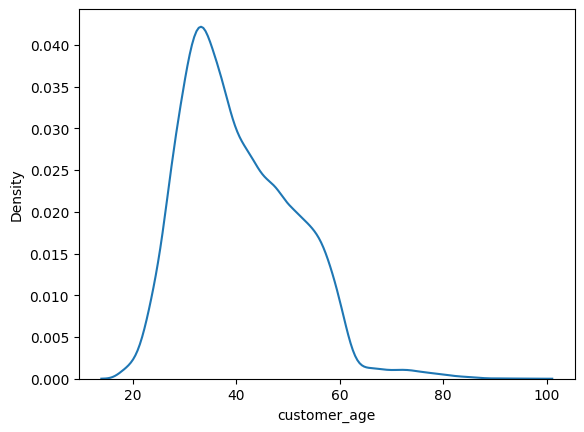

missing values of customer_age 619


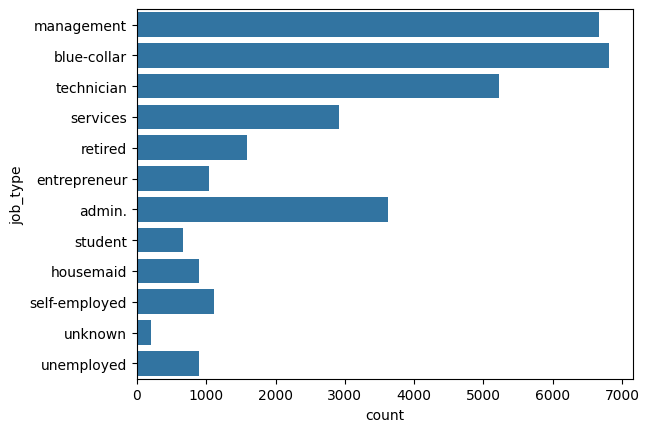

value_counts of job_type job_type
blue-collar      6816
management       6666
technician       5220
admin.           3627
services         2923
retired          1591
self-employed    1111
entrepreneur     1037
unemployed        901
housemaid         893
student           663
unknown           199
Name: count, dtype: int64
missing values of job_type 0


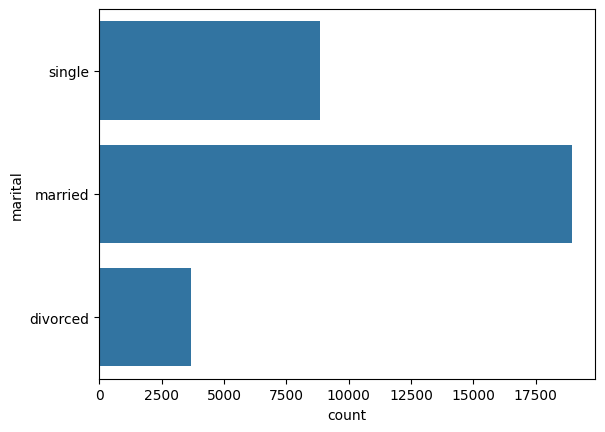

value_counts of marital marital
married     18945
single       8857
divorced     3695
Name: count, dtype: int64
missing values of marital 150


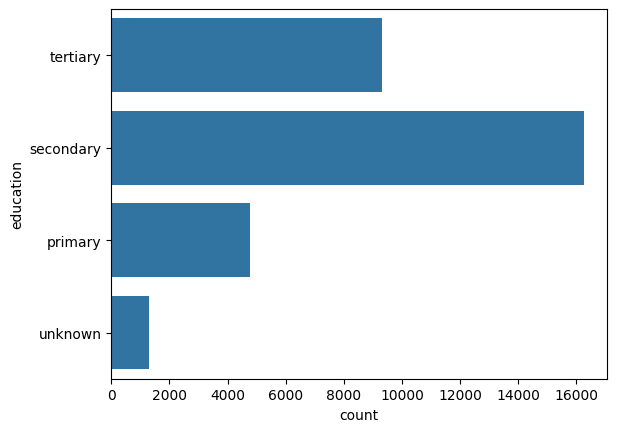

value_counts of education education
secondary    16247
tertiary      9321
primary       4787
unknown       1292
Name: count, dtype: int64
missing values of education 0


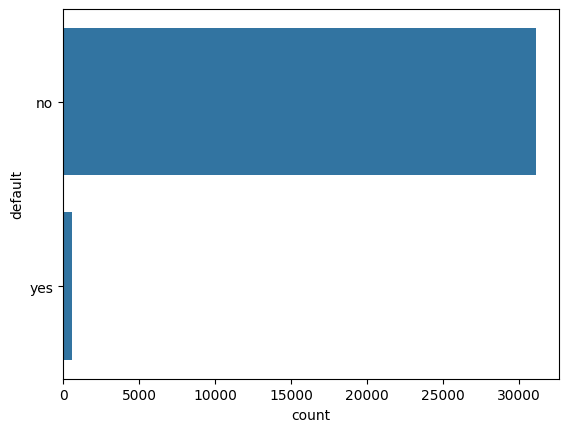

value_counts of default default
no     31094
yes      553
Name: count, dtype: int64
missing values of default 0


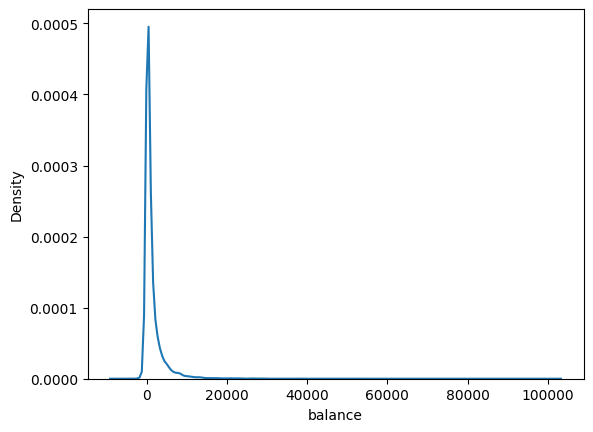

missing values of balance 399


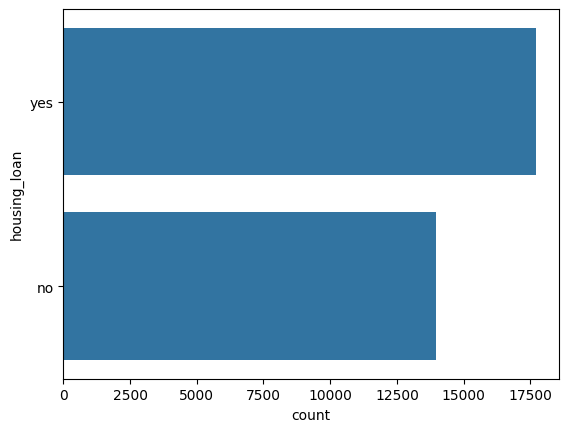

value_counts of housing_loan housing_loan
yes    17700
no     13947
Name: count, dtype: int64
missing values of housing_loan 0


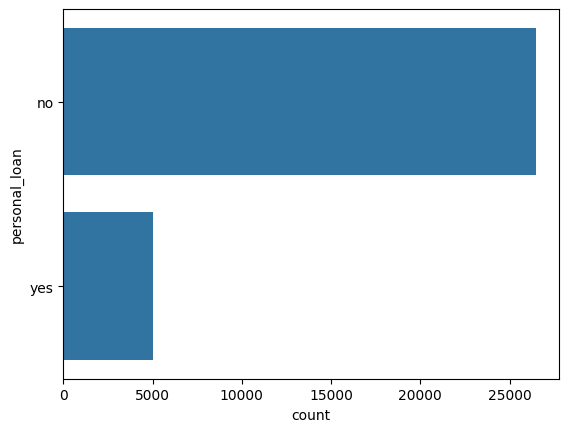

value_counts of personal_loan personal_loan
no     26463
yes     5035
Name: count, dtype: int64
missing values of personal_loan 149


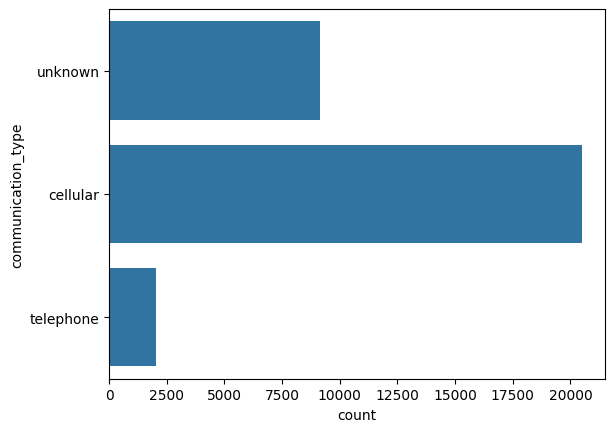

value_counts of communication_type communication_type
cellular     20480
unknown       9151
telephone     2016
Name: count, dtype: int64
missing values of communication_type 0


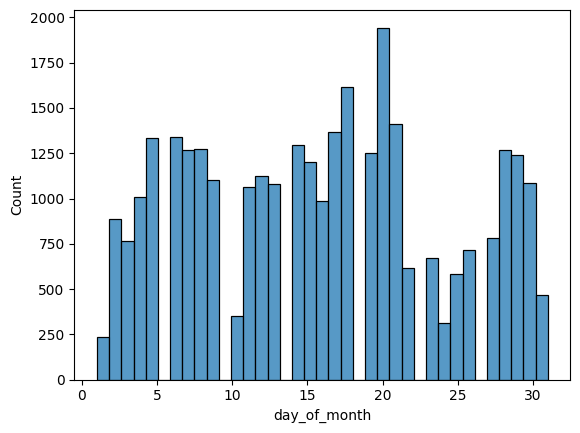

value_counts of day_of_month day_of_month
20    1944
18    1615
21    1414
17    1366
6     1342
5     1336
14    1294
8     1276
7     1269
28    1268
19    1249
29    1240
15    1201
12    1122
9     1101
30    1087
13    1080
11    1062
4     1009
16     985
2      885
27     780
3      767
26     715
23     670
22     618
25     583
31     469
10     353
24     312
1      235
Name: count, dtype: int64
missing values of day_of_month 0


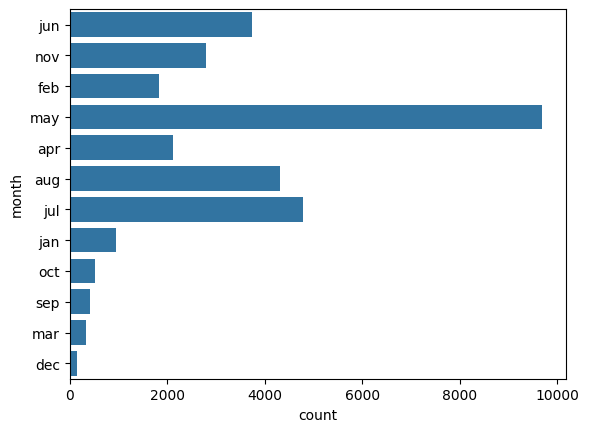

value_counts of month month
may    9685
jul    4786
aug    4308
jun    3746
nov    2801
apr    2111
feb    1836
jan     953
oct     510
sep     417
mar     338
dec     156
Name: count, dtype: int64
missing values of month 0


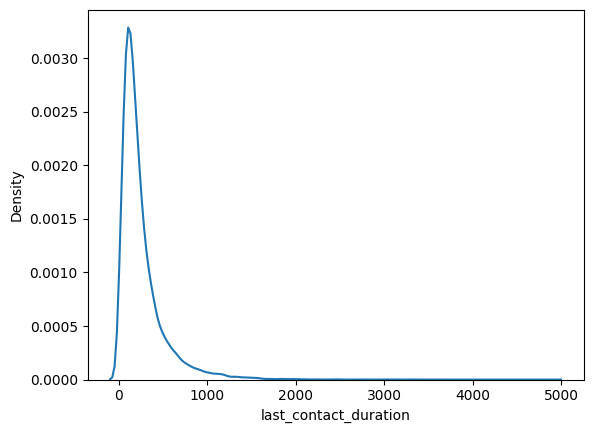

missing values of last_contact_duration 311


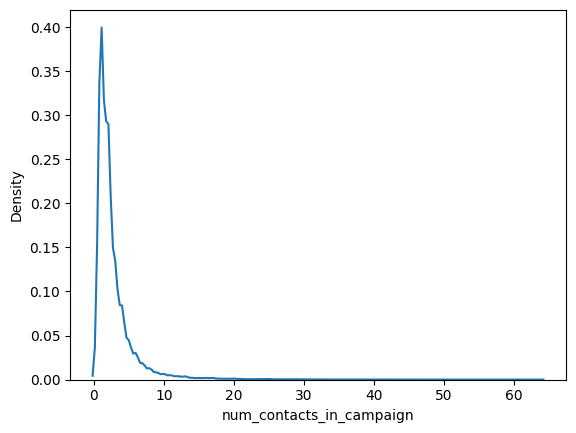

missing values of num_contacts_in_campaign 112


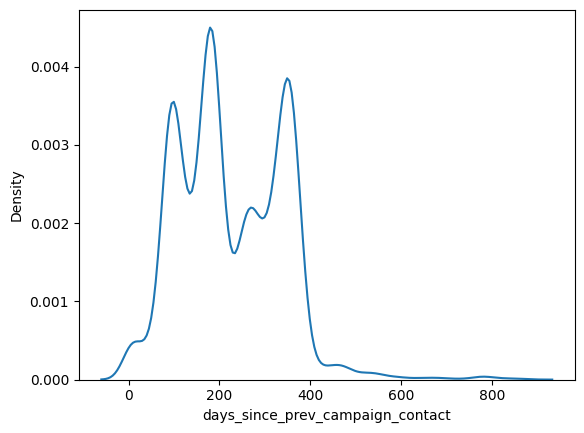

missing values of days_since_prev_campaign_contact 25831


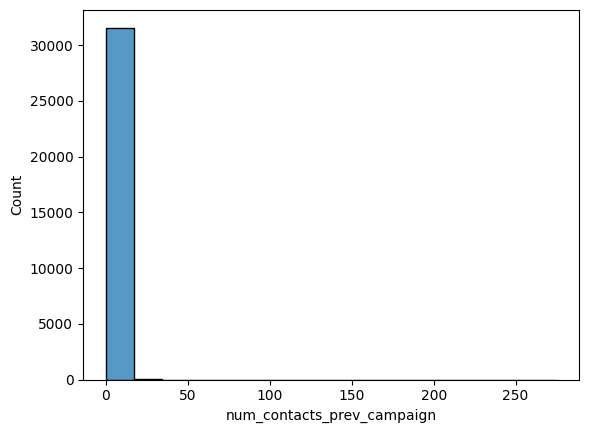

value_counts of num_contacts_prev_campaign num_contacts_prev_campaign
0      25831
1       1938
2       1507
3        806
4        500
5        311
6        188
7        148
8         91
9         62
10        48
11        46
12        34
13        28
14        15
15        14
17        11
20         7
19         7
23         6
16         6
22         5
18         5
24         4
25         4
27         4
29         3
30         3
37         2
21         2
275        1
55         1
32         1
41         1
26         1
38         1
40         1
51         1
58         1
35         1
28         1
Name: count, dtype: int64
missing values of num_contacts_prev_campaign 0


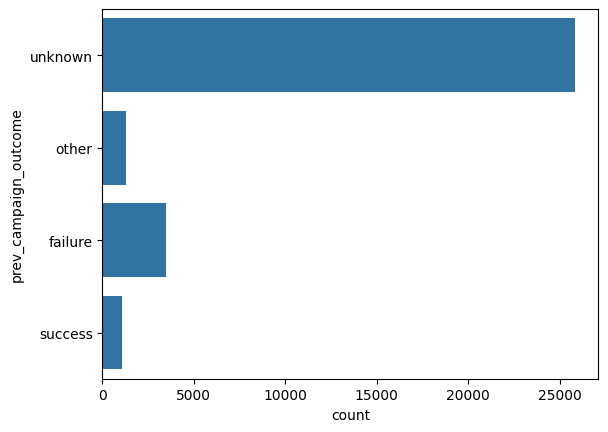

value_counts of prev_campaign_outcome prev_campaign_outcome
unknown    25833
failure     3472
other       1272
success     1070
Name: count, dtype: int64
missing values of prev_campaign_outcome 0


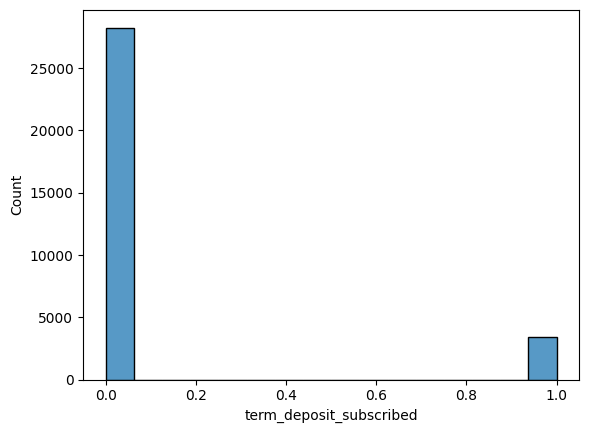

value_counts of term_deposit_subscribed term_deposit_subscribed
0    28253
1     3394
Name: count, dtype: int64
missing values of term_deposit_subscribed 0


In [290]:
for i in df.columns:
  eda(i,df,col_to_miss,col_to_le)

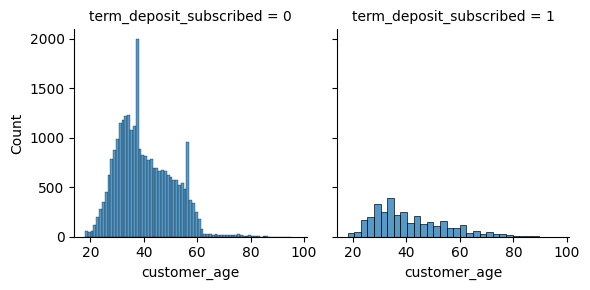

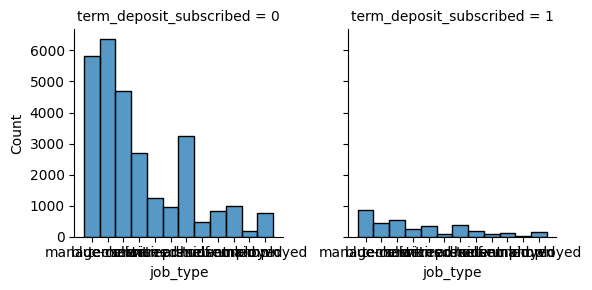

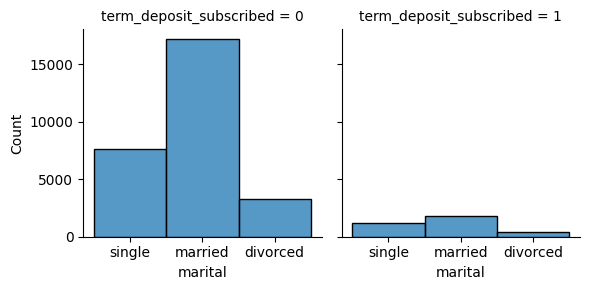

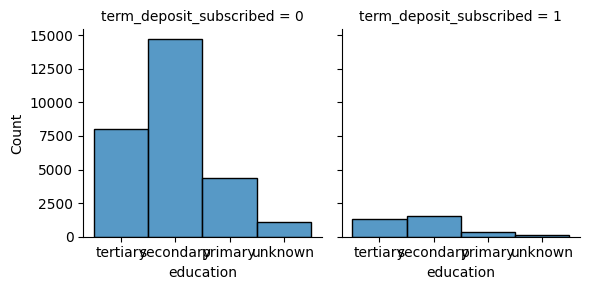

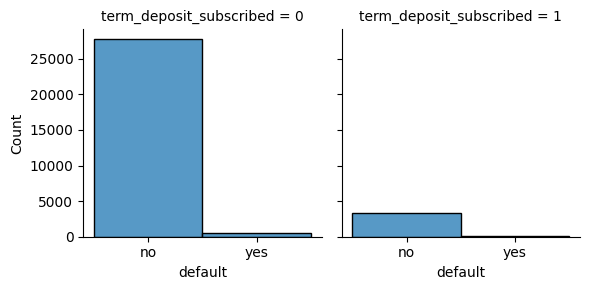

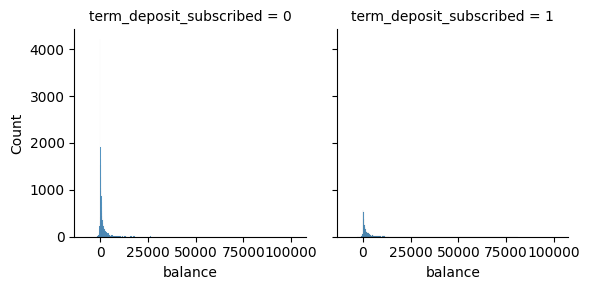

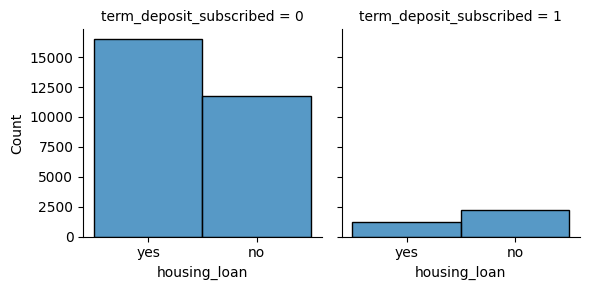

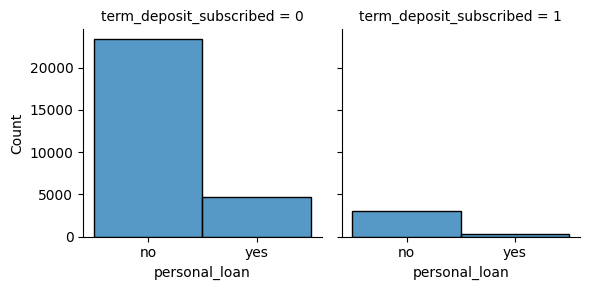

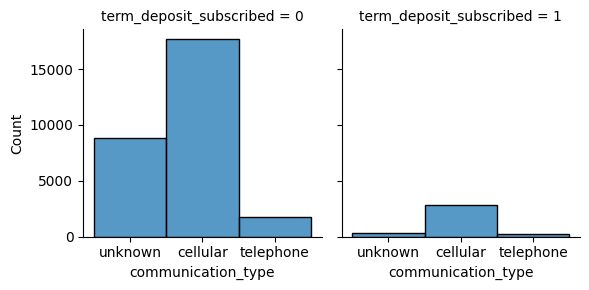

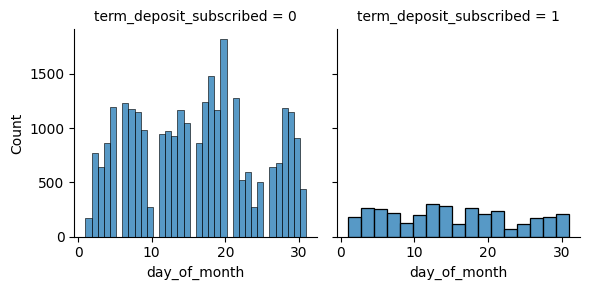

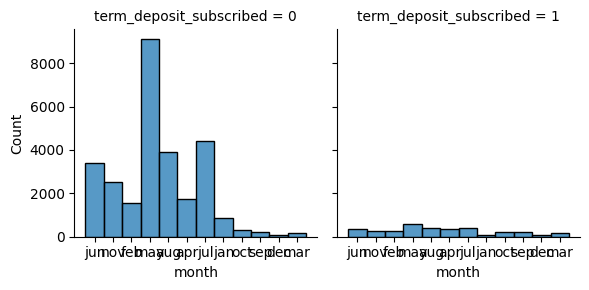

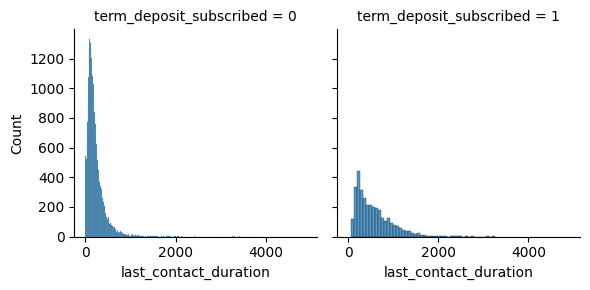

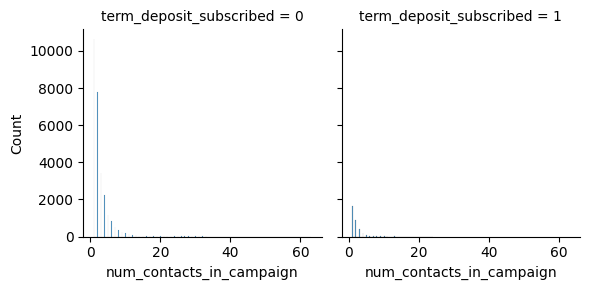

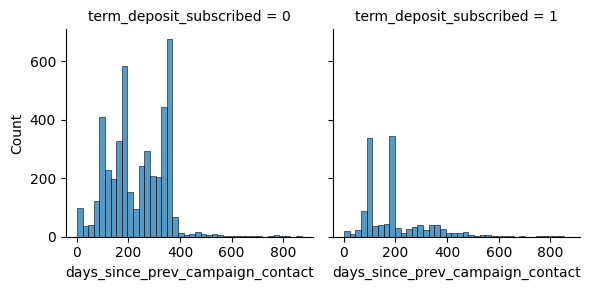

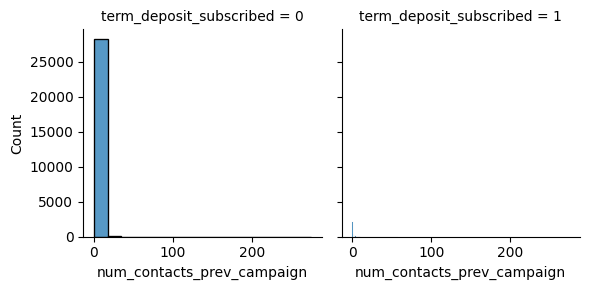

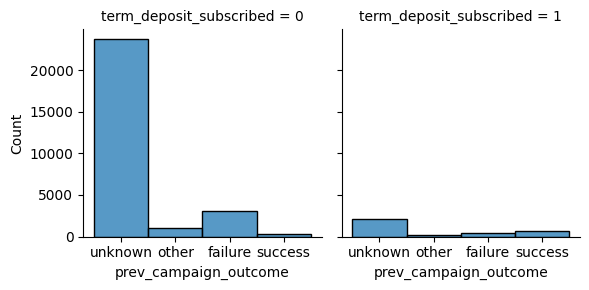

In [291]:
for i in df.drop('term_deposit_subscribed',axis=1):
  grid=sns.FacetGrid(df,col='term_deposit_subscribed',col_wrap=2)
  grid.map(sns.histplot,i)
plt.show()


In [292]:
#To check for duplicated records of data
df[df.duplicated(keep='first')]

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed


# **4.Data Cleaning**

### **Handling missing Values**

In [293]:
#Columns t handle missing values
col_to_miss

['customer_age',
 'marital',
 'balance',
 'personal_loan',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact']

In [294]:
for i in col_to_miss:
  if df[i].isna().sum()>(0.8*df.shape[0]):
    df.drop(i,axis=1,inplace=True)
    print(f"column {i} has more than 80% missing values and hence it is droppped")
    col_to_miss.remove(i)



column days_since_prev_campaign_contact has more than 80% missing values and hence it is droppped


In [295]:
#Filling na value with median of the columns
df['customer_age'].fillna(df['customer_age'].median(),inplace=True)

In [296]:
#Marital na values are filled by constant = missing
df['marital'].fillna('missing',inplace=True)

In [297]:
#Filling na values with zero
df['balance']=df['balance'].fillna(0)

In [298]:
#Filling na values with constant=no
df['personal_loan'].fillna('no',inplace=True)

In [299]:
#last_contact_duration
df['last_contact_duration'].fillna(0,inplace=True)

In [300]:
#filling na values with  0
df['num_contacts_in_campaign'].fillna(0,inplace=True)

In [301]:
df['num_contacts_in_campaign'] = df['num_contacts_in_campaign'].round().astype(int)


In [302]:
df.isna().sum()

customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
term_deposit_subscribed       0
dtype: int64

### **Outliers-Handling**

<Axes: >

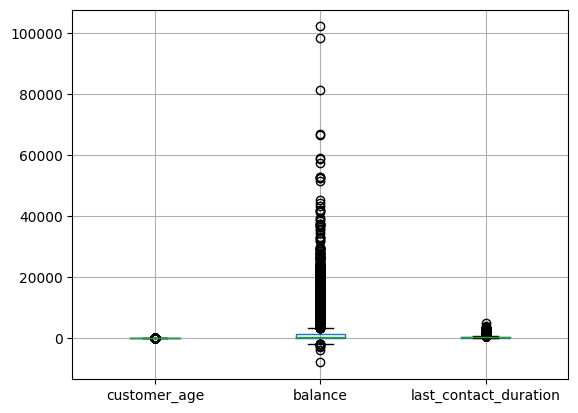

In [303]:
#Plotting boxplots to identify the outliers
df.select_dtypes(include='float').boxplot()

In [304]:
#Identifying ouliers in each column of continuous numeric data
for i in df.select_dtypes(include='float').columns:
  outlier=[]
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  for j in df[i]:
    if(j< Q1-1.5* IQR) | (j> Q3+1.5* IQR):
      outlier.append(j)

  print(f"outlier for column {i}are ",outlier)
  #Outlier is not handled as it will remove the column 'num_contacts_prev_campaign'


  df[i] = np.clip(df[i], Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
  outlier_n=[]
  for j in df[i]:
    if(j< Q1-1.5* IQR) | (j> Q3+1.5* IQR):
      outlier_n.append(j)
  print(f"outlier for column {i}are ",outlier_n)



outlier for column customer_ageare  [78.0, 76.0, 73.0, 88.0, 73.0, 81.0, 79.0, 73.0, 77.0, 75.0, 74.0, 74.0, 86.0, 77.0, 79.0, 75.0, 95.0, 77.0, 74.0, 74.0, 79.0, 76.0, 74.0, 76.0, 73.0, 80.0, 75.0, 79.0, 77.0, 74.0, 82.0, 79.0, 76.0, 75.0, 82.0, 73.0, 76.0, 86.0, 73.0, 77.0, 80.0, 83.0, 78.0, 75.0, 74.0, 75.0, 77.0, 74.0, 77.0, 76.0, 77.0, 77.0, 79.0, 79.0, 73.0, 79.0, 75.0, 83.0, 84.0, 73.0, 79.0, 77.0, 76.0, 78.0, 74.0, 74.0, 83.0, 73.0, 78.0, 81.0, 73.0, 73.0, 76.0, 75.0, 80.0, 75.0, 84.0, 73.0, 80.0, 74.0, 74.0, 76.0, 78.0, 78.0, 75.0, 97.0, 81.0, 82.0, 75.0, 77.0, 77.0, 73.0, 76.0, 75.0, 87.0, 73.0, 73.0, 84.0, 81.0, 80.0, 73.0, 73.0, 73.0, 86.0, 78.0, 82.0, 79.0, 77.0, 76.0, 75.0, 87.0, 73.0, 80.0, 80.0, 81.0, 80.0, 91.0, 80.0, 73.0, 77.0, 85.0, 74.0, 74.0, 75.0, 74.0, 73.0, 75.0, 86.0, 75.0, 74.0, 75.0, 75.0, 80.0, 75.0, 75.0, 85.0, 74.0, 77.0, 74.0, 83.0, 86.0, 76.0, 85.0, 74.0, 74.0, 75.0, 76.0, 85.0, 73.0, 81.0, 73.0, 80.0, 79.0, 91.0, 76.0, 79.0, 77.0, 82.0, 73.0, 76.0, 74.

In [305]:
#Creating a copy of data frame and further analysis is done on df_n
df_n=df.copy()

In [306]:
df_n.drop(['month','prev_campaign_outcome','day_of_month'],axis=1,inplace=True)

Skewness Treatment

customer_age
skewnwss for column customer_age is 0.5530319940381051


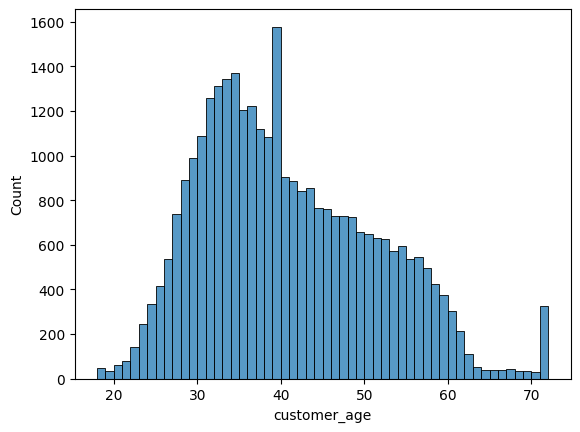

balance
skewnwss for column balance is 1.0978396633641767


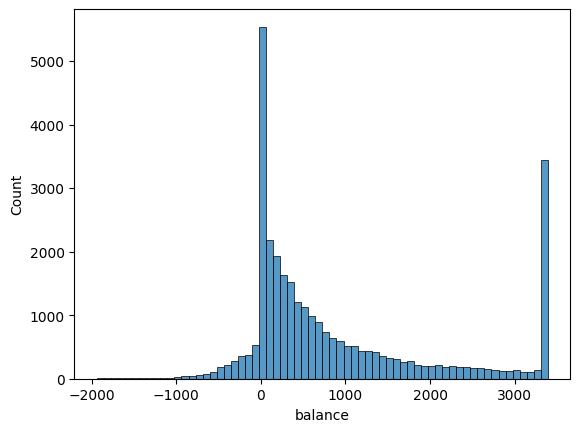

last_contact_duration
skewnwss for column last_contact_duration is 1.0128454993602183


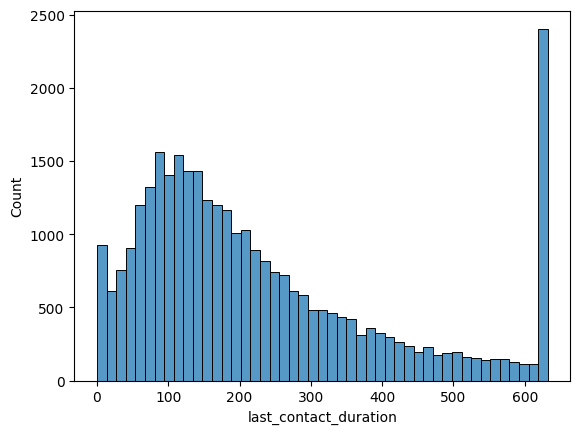

In [307]:
#plotting the histogram before log transformation
for i in df_n.select_dtypes(include='float').columns:
  print(i)
  print(f"skewnwss for column {i} is {df_n[i].skew()}")
  sns.histplot(df_n[i])
  plt.show()


In [308]:
from sklearn.preprocessing import PowerTransformer

In [309]:
pt = PowerTransformer(method='yeo-johnson')


customer_age
skewnwss for column customer_age is 0.5530319940381051


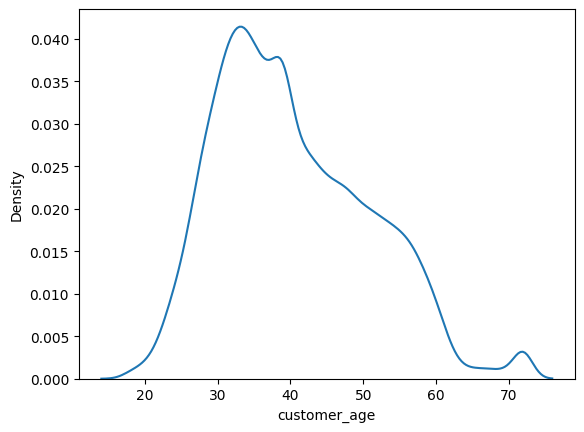

balance
skewnwss for column balance is 0.13835846411324446


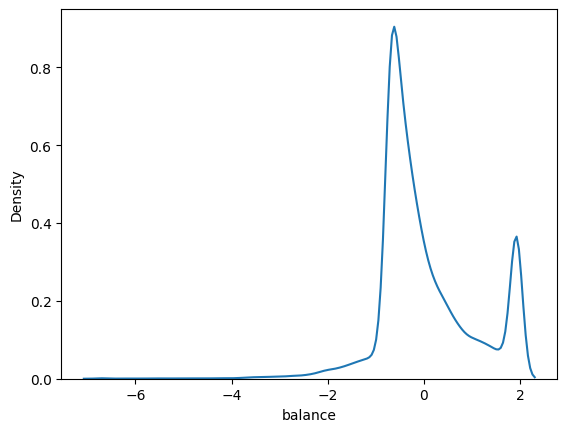

last_contact_duration
skewnwss for column last_contact_duration is 0.20095929784965574


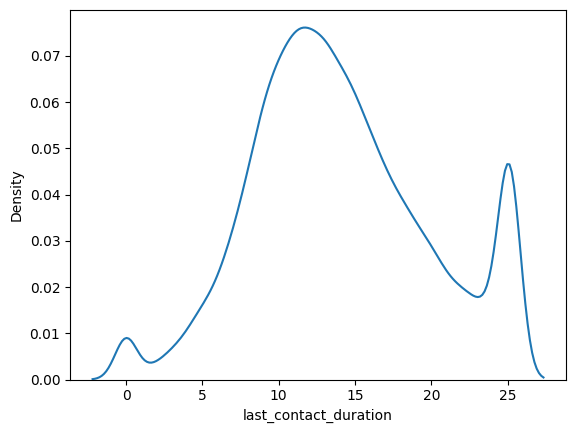

In [310]:
#plotting kdeplot after the sqrt transformation applied

pd.set_option('display.max_rows', None)
for i in df_n.select_dtypes(include='float').columns:
  print(i)
  if abs(df_n[i].skew())>0.8 and (i!='balance'):
    df_n[i]=np.sqrt(df_n[i])
  if abs(df_n[i].skew())>0.8 and (i=='balance'):
    df_n[i] = pt.fit_transform(df_n[i].values.reshape(-1, 1))
  print(f"skewnwss for column {i} is {df_n[i].skew()}")
  sns.kdeplot(df_n[i])
  plt.show()

# **Label encoding**

In [311]:
col_to_le

['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

In [312]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ['default', 'housing_loan', 'personal_loan']:
 df_n[i]=le.fit_transform(df_n[i])


In [313]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in ['job_type', 'marital', 'education','communication_type']:
  df_n[i]=oe.fit_transform(df_n[i].values.reshape(-1,1))

In [314]:
for i in ['job_type', 'marital', 'education','communication_type']:
  df_n[i]=df_n[i].astype(int)

In [315]:
#Checking data types to see the encoding
df_n.dtypes

customer_age                  float64
job_type                        int64
marital                         int64
education                       int64
default                         int64
balance                       float64
housing_loan                    int64
personal_loan                   int64
communication_type              int64
last_contact_duration         float64
num_contacts_in_campaign        int64
num_contacts_prev_campaign      int64
term_deposit_subscribed         int64
dtype: object

In [316]:
df_n.isna().sum()

customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
term_deposit_subscribed       0
dtype: int64

In [317]:
import joblib
from joblib import dump


In [318]:
joblib.dump(df_n,'df_n.joblib')

['df_n.joblib']

In [319]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = scaler.fit_transform(df_n)


In [320]:
joblib.dump(df_std,'df_std.joblib')

['df_std.joblib']

# **DBSCAN**

In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering
import joblib
from joblib import dump,load

In [322]:
df_n=joblib.load('/content/df_n.joblib')

In [323]:
df_std=joblib.load('/content/df_std.joblib')


In [324]:
#Convering to a data frame
df_std = pd.DataFrame(df_std, columns=df_n.columns)

In [325]:
df_std.columns

Index(['customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'last_contact_duration', 'num_contacts_in_campaign',
       'num_contacts_prev_campaign', 'term_deposit_subscribed'],
      dtype='object')

In [326]:
df_std.drop('term_deposit_subscribed',axis=1,inplace=True)

In [327]:
from sklearn.cluster import DBSCAN

In [328]:
df_std.drop([
        'num_contacts_in_campaign',
       'num_contacts_prev_campaign'],axis=1,inplace=True)

In [329]:
# Initialize DBSCAN with chosen parameters
eps = 2  # Example value, adjust as needed
min_samples = 5  # Example value, adjust as needed
db = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the model to the data
db.fit(df_std)

# Extract cluster labels
labels = db.labels_

# Add cluster labels to your original data
df_std['Cluster'] = labels

In [330]:
df_std.columns

Index(['customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'last_contact_duration', 'Cluster'],
      dtype='object')

In [331]:
df_std['Cluster'].value_counts()

Cluster
 0     14439
 2     11805
 3      2954
 1      1873
 5       163
 7       105
-1        96
 4        95
 6        47
 9        34
 8        31
 10        5
Name: count, dtype: int64

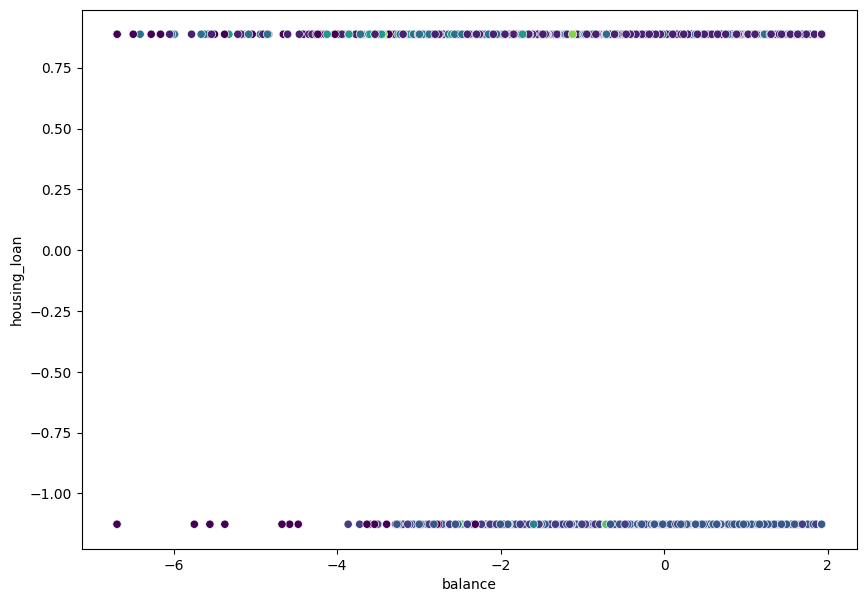

In [332]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_std.iloc[:, 5], y=df_std.iloc[:, 6], c=labels, cmap='viridis')
plt.show()

In [333]:
print(df_std.groupby('Cluster').median())

         customer_age  job_type   marital  education   default   balance  \
Cluster                                                                    
-1           0.013167 -0.098901 -0.438917  -0.300962  7.498523 -2.796298   
 0          -0.320835 -0.098901 -0.438917  -0.300962 -0.133360 -0.285523   
 1           0.156311 -0.098901 -0.438917  -0.300962 -0.133360 -0.449895   
 2           0.060881 -0.098901 -0.438917  -0.300962 -0.133360 -0.163059   
 3          -0.225406 -0.098901 -0.438917  -0.300962 -0.133360 -0.433650   
 4          -0.129977 -0.098901 -0.438917  -0.300962  7.498523 -0.714984   
 5          -0.225406 -0.098901 -0.438917  -0.300962  7.498523 -0.790024   
 6          -0.320835 -0.098901 -0.438917  -0.300962  7.498523 -0.707958   
 7          -0.034548  0.207653 -0.438917  -0.300962  7.498523 -0.706434   
 8          -1.179698 -0.098901  1.521757  -0.300962  7.498523 -1.221926   
 9          -0.273121 -1.018561 -0.438917  -0.300962  7.498523 -0.713140   
 10         

In [334]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

silhouette_avg = silhouette_score(df_std, labels)
db_score = davies_bouldin_score(df_std, labels)
ch_score = calinski_harabasz_score(df_std, labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Score: {db_score}')
print(f'Calinski-Harabasz Score: {ch_score}')

Silhouette Score: 0.23010932328647155
Davies-Bouldin Score: 1.458573989925967
Calinski-Harabasz Score: 1978.8255410277818


In [335]:
df_new=pd.concat([df_n,df_std['Cluster']],axis=1)

In [336]:
df_new.groupby('Cluster').median()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
Cluster,,,,,,,,,,,,,
-1,40.5,4.0,1.0,1.0,1.0,-2.796298,1.0,1.0,1.0,12.348940,2.0,0.0,0.0
0,37.0,4.0,1.0,1.0,0.0,-0.285523,1.0,0.0,0.0,13.416408,2.0,0.0,0.0
1,42.0,4.0,1.0,1.0,0.0,-0.449895,0.0,1.0,0.0,13.038405,2.0,0.0,0.0
2,41.0,4.0,1.0,1.0,0.0,-0.163059,0.0,0.0,0.0,13.304135,2.0,0.0,0.0
3,38.0,4.0,1.0,1.0,0.0,-0.433650,1.0,1.0,0.0,13.228757,2.0,0.0,0.0
4,39.0,4.0,1.0,1.0,1.0,-0.714984,0.0,1.0,0.0,13.416408,2.0,0.0,0.0
5,38.0,4.0,1.0,1.0,1.0,-0.790024,1.0,0.0,0.0,13.784049,2.0,0.0,0.0
6,37.0,4.0,1.0,1.0,1.0,-0.707958,1.0,1.0,0.0,11.916375,2.0,0.0,0.0
7,40.0,5.0,1.0,1.0,1.0,-0.706434,0.0,0.0,0.0,12.041595,2.0,0.0,0.0


<ipython-input-337-b371ec78c134>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df_new["Cluster"], palette= 'hls')


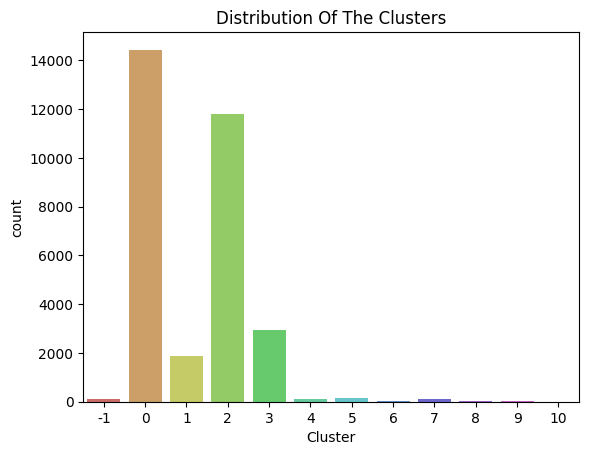

In [337]:

pl = sns.countplot(x=df_new["Cluster"], palette= 'hls')
pl.set_title("Distribution Of The Clusters")
plt.show()

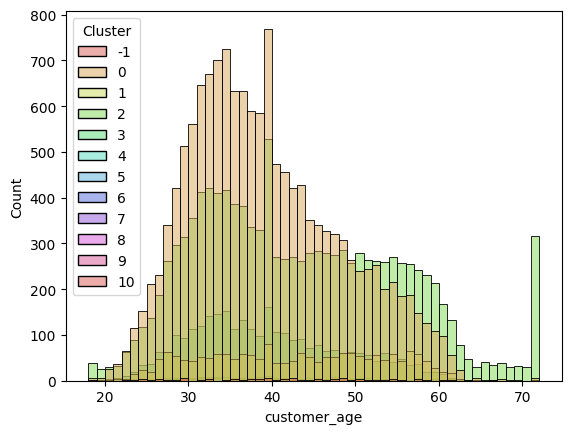

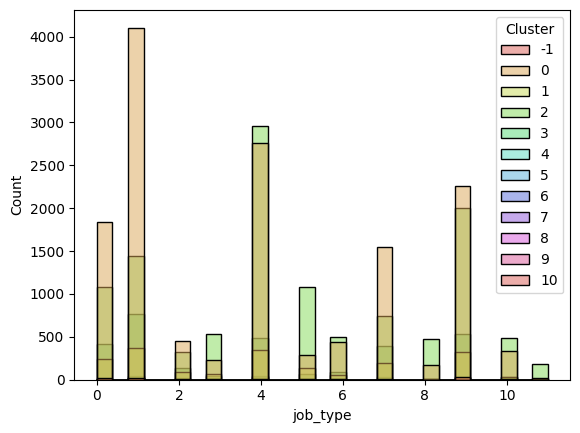

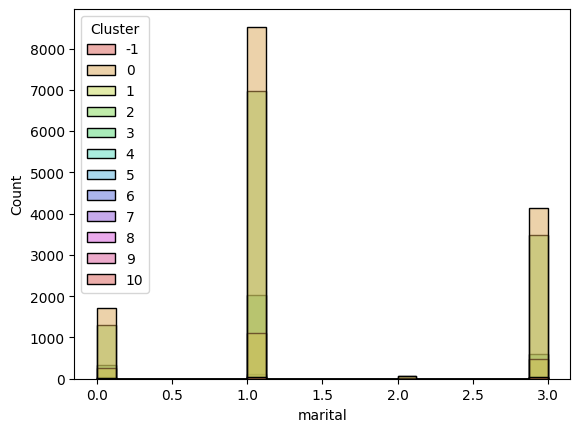

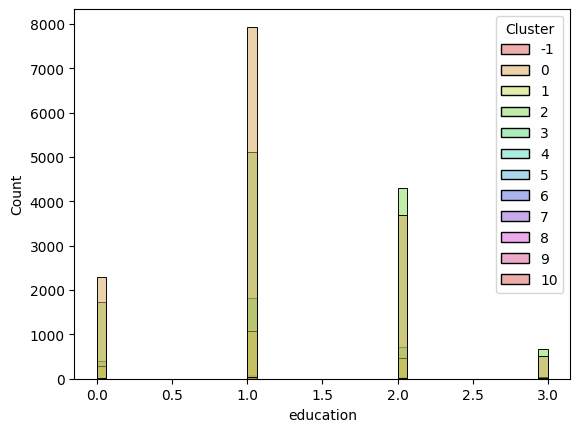

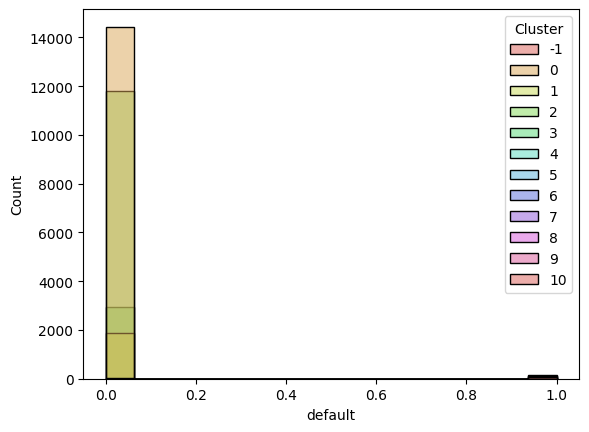

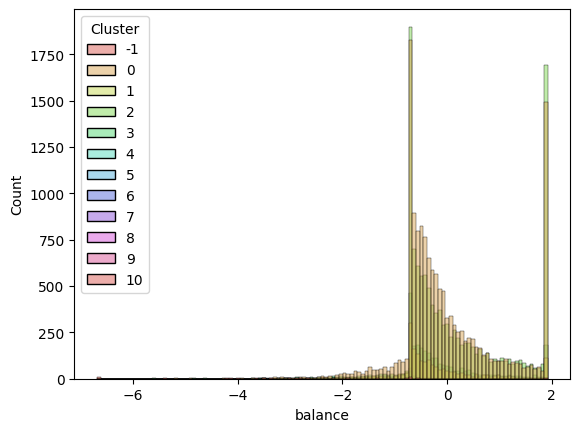

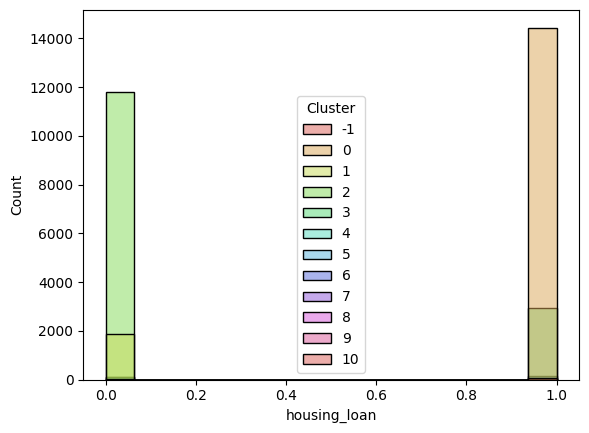

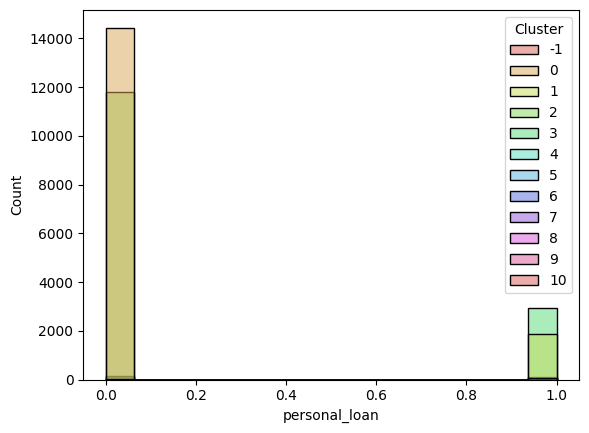

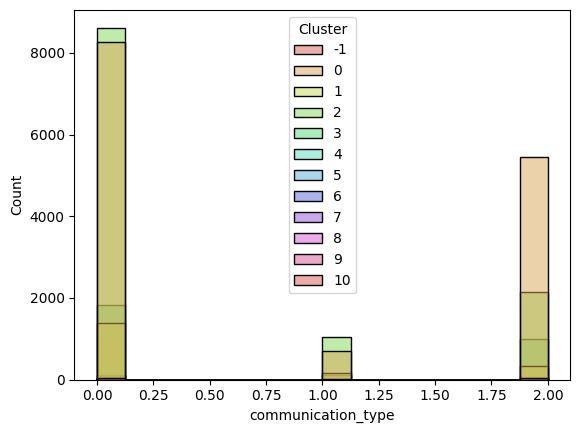

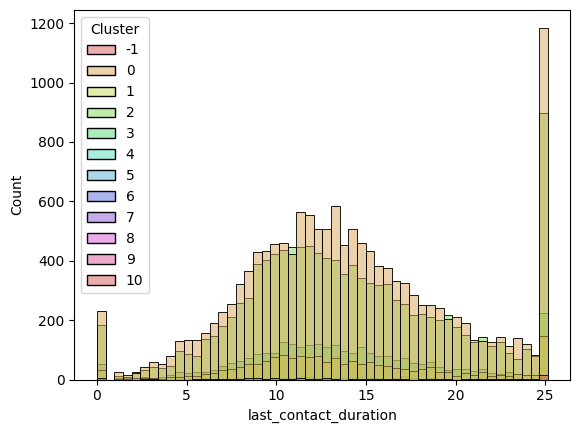

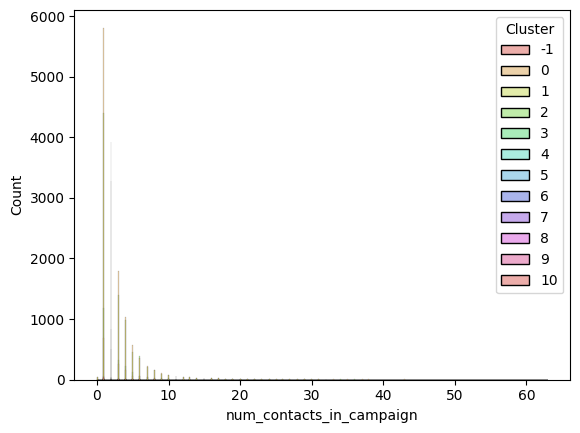

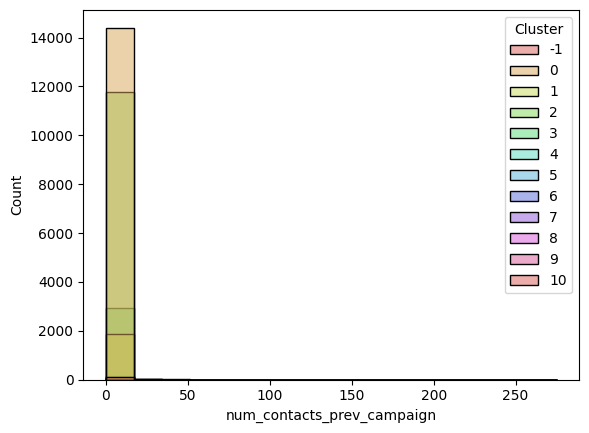

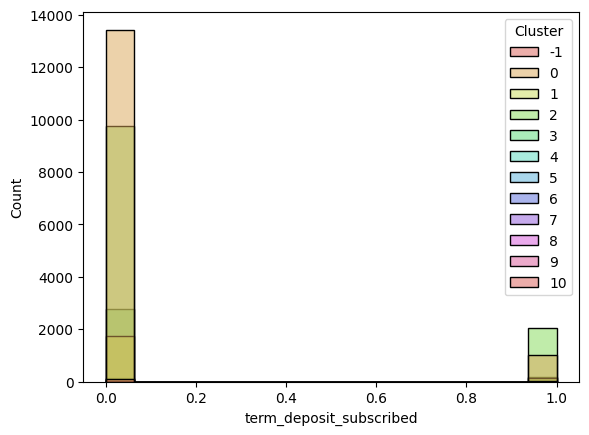

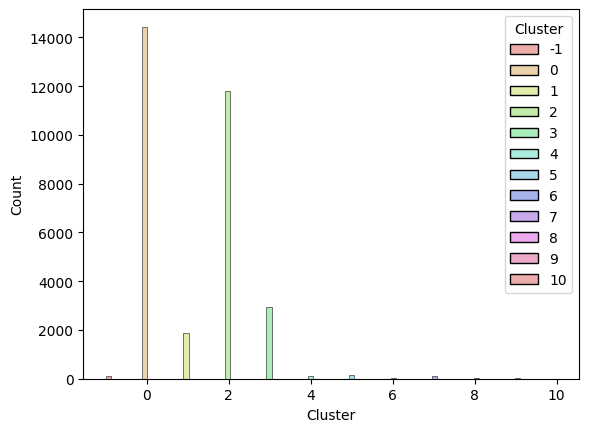

In [338]:
for i in df_new.columns:
  sns.histplot(x=df_new[i],hue=df_new['Cluster'],palette='hls')
  plt.show()

<ipython-input-339-95df314d9eca>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  pl = sns.histplot(x=df_new["Cluster"],y=df_n['term_deposit_subscribed'], palette= 'hls')


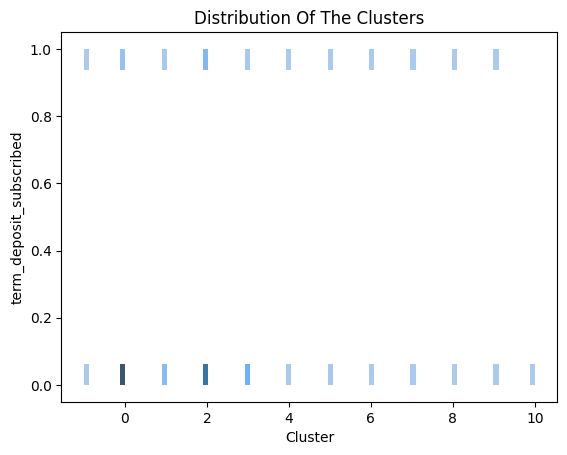

In [339]:
pl = sns.histplot(x=df_new["Cluster"],y=df_n['term_deposit_subscribed'], palette= 'hls')
pl.set_title("Distribution Of The Clusters")
plt.show()

# **PCA**

In [340]:
df_std=joblib.load('/content/df_std.joblib')


In [341]:
#Convering to a data frame
df_std = pd.DataFrame(df_std, columns=df_n.columns)

In [342]:
df_std.drop('term_deposit_subscribed',axis=1,inplace=True)

In [343]:
df_std.drop([
        'num_contacts_in_campaign',
       'num_contacts_prev_campaign'],axis=1,inplace=True)

In [344]:
from sklearn.decomposition import PCA

In [345]:
pca = PCA()
pca.fit(df_std)

PCA()

In [346]:
pca.explained_variance_ratio_

array([0.1532964 , 0.14569503, 0.11881485, 0.10121907, 0.09574766,
       0.09175652, 0.08381324, 0.08181866, 0.07552956, 0.05230899])

Text(0, 0.5, 'Cumulative Explained Variance')

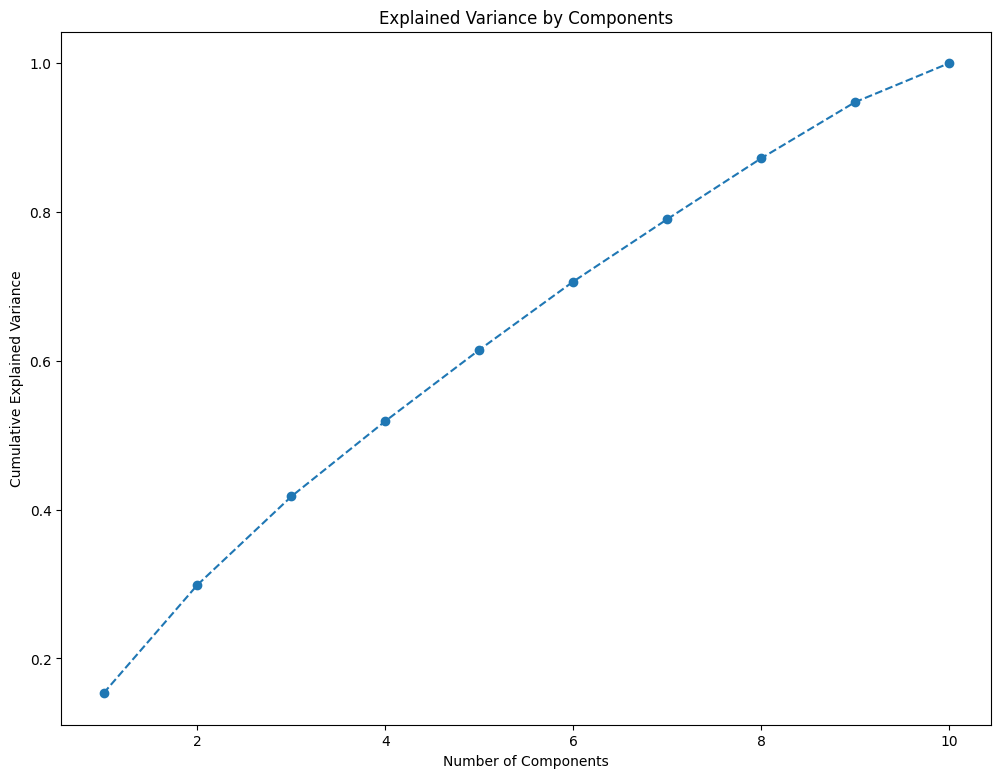

In [347]:
plt.figure(figsize = (12,9))
plt.plot(range(1, pca.explained_variance_ratio_.cumsum().shape[0] + 1),
         pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--') # Adjust the x-axis range to match the length of the y-axis data
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [348]:
pca = PCA(n_components = 6)
pca.fit(df_std)
pca.components_

array([[-0.54874183,  0.30285014,  0.60806939,  0.41160992, -0.01387906,
         0.02173691, -0.07143365, -0.10929008, -0.21965261,  0.04509554],
       [-0.40508626, -0.2722948 ,  0.17462895, -0.23295192,  0.22176843,
        -0.43909248,  0.51726151,  0.23997637,  0.32471518, -0.06653779],
       [ 0.11240268,  0.23799738, -0.12771516,  0.1066277 ,  0.53583362,
        -0.44849346, -0.32419693,  0.44824177, -0.31923066, -0.08273848],
       [ 0.06623206,  0.21512997, -0.02312545,  0.1757755 ,  0.02638481,
        -0.04592391, -0.01509189, -0.20451853,  0.31648785, -0.87913325],
       [ 0.11863623,  0.33904928, -0.08352845,  0.14065261,  0.47549611,
        -0.08723235,  0.06612105, -0.46920755,  0.46198559,  0.41538709],
       [-0.05446395, -0.51379231,  0.21417276, -0.29114111,  0.4336766 ,
         0.03908013, -0.31575684, -0.48563496, -0.23478126, -0.14882685]])

In [349]:
# Calculate the number of components from the shape of pca.components_
n_components = pca.components_.shape[1]

# Generate column names dynamically based on the number of components
component_columns = [f'c{i+1}' for i in range(n_components)]

df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_std.columns,index=['c1', 'c2', 'c3','c4','c5','c6'])# Use generated column names)
df_pca_comp

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration
c1,-0.548742,0.302850,0.608069,0.411610,-0.013879,0.021737,-0.071434,-0.109290,-0.219653,0.045096
c2,-0.405086,-0.272295,0.174629,-0.232952,0.221768,-0.439092,0.517262,0.239976,0.324715,-0.066538
c3,0.112403,0.237997,-0.127715,0.106628,0.535834,-0.448493,-0.324197,0.448242,-0.319231,-0.082738
c4,0.066232,0.215130,-0.023125,0.175775,0.026385,-0.045924,-0.015092,-0.204519,0.316488,-0.879133
c5,0.118636,0.339049,-0.083528,0.140653,0.475496,-0.087232,0.066121,-0.469208,0.461986,0.415387
c6,-0.054464,-0.513792,0.214173,-0.291141,0.433677,0.039080,-0.315757,-0.485635,-0.234781,-0.148827


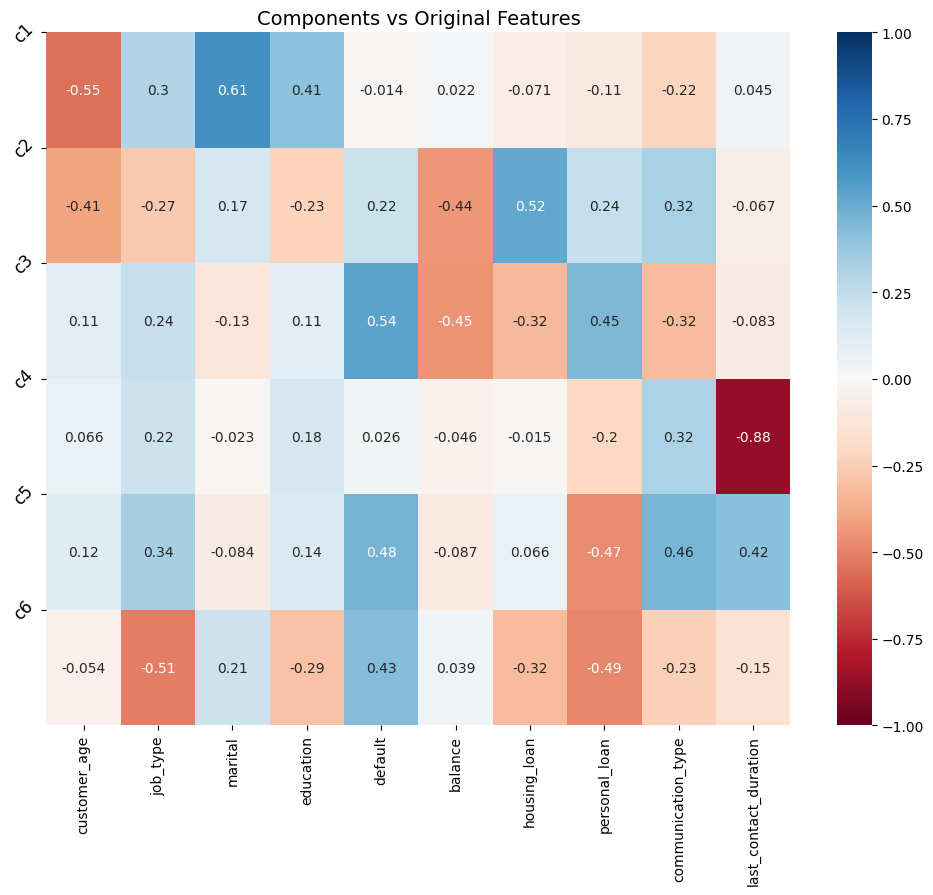

In [350]:
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2,3,4,5],
           ['c1', 'c2', 'c3','c4','c5','c6'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

In [351]:
pca.transform(df_std)
scores_pca = pca.transform(df_std)

In [352]:
import pickle

# Save the PCA model to a file
with open('pca_model.pkl', 'wb') as file:
    pickle.dump(pca, file)

# **DBSCAN after PCA**

In [353]:
from sklearn.cluster import DBSCAN

In [354]:
scores_pca_db=scores_pca

In [355]:
scores_pca_db = pd.DataFrame(scores_pca_db)

In [356]:
# Initialize DBSCAN with chosen parameters
eps = 2  # Example value, adjust as needed
min_samples = 5  # Example value, adjust as needed
db = DBSCAN(eps=eps, min_samples=min_samples).fit(scores_pca_db)

# Extract cluster labels
labels = db.labels_

# Add cluster labels to your original data
scores_pca_db['Cluster'] = labels

In [357]:
import pickle

In [358]:
# Open the file in write-binary mode and use pickle to dump the model
with open('db_model.pkl', 'wb') as file:
    pickle.dump(db, file)

In [359]:
scores_pca_db['Cluster'].value_counts()

Cluster
 0    31094
 1      549
-1        4
Name: count, dtype: int64

In [360]:
scores_pca_db_n=pd.concat([df_n,scores_pca_db],axis=1)

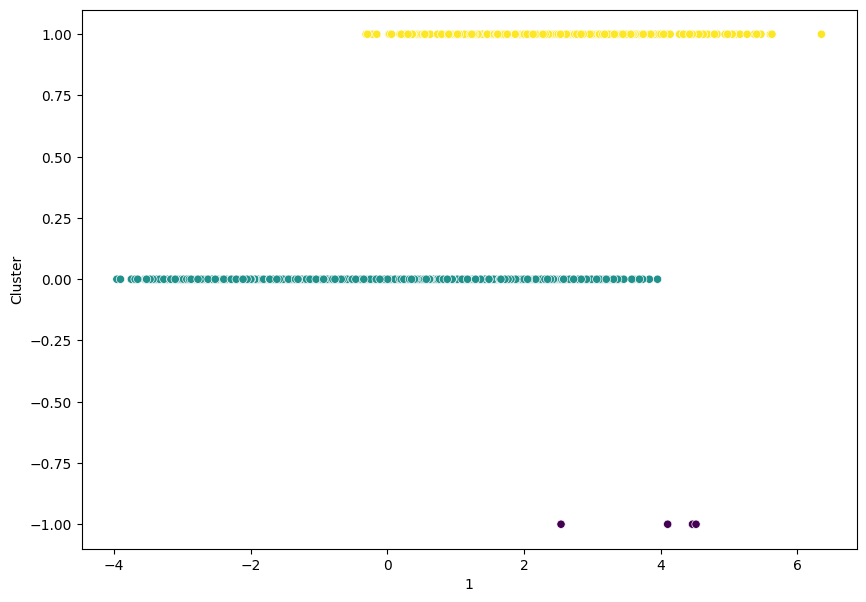

In [361]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scores_pca_db_n.iloc[:, 14], y=scores_pca_db_n.iloc[:, 19], c=labels, cmap='viridis')
plt.show()

In [362]:
print(scores_pca_db_n.groupby('Cluster').median())

         customer_age  job_type  marital  education  default   balance  \
Cluster                                                                  
-1               45.5       9.0      1.0        1.0      1.0 -5.675902   
 0               39.0       4.0      1.0        1.0      0.0 -0.278671   
 1               38.0       4.0      1.0        1.0      1.0 -0.716865   

         housing_loan  personal_loan  communication_type  \
Cluster                                                    
-1                0.5            1.0                 0.0   
 0                1.0            0.0                 0.0   
 1                1.0            0.0                 0.0   

         last_contact_duration  num_contacts_in_campaign  \
Cluster                                                    
-1                   16.290064                       1.0   
 0                   13.341664                       2.0   
 1                   13.038405                       2.0   

         num_contacts_prev_

In [363]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

silhouette_avg = silhouette_score(scores_pca_db, labels)
db_score = davies_bouldin_score(scores_pca_db, labels)
ch_score = calinski_harabasz_score(scores_pca_db, labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Score: {db_score}')
print(f'Calinski-Harabasz Score: {ch_score}')

Silhouette Score: 0.575236848506083
Davies-Bouldin Score: 1.1104921064977729
Calinski-Harabasz Score: 2288.857398815587


In [364]:
df_new=pd.concat([df_n,scores_pca_db['Cluster']],axis=1)

In [365]:
df_new.groupby('Cluster').median()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
Cluster,,,,,,,,,,,,,
-1,45.5,9.0,1.0,1.0,1.0,-5.675902,0.5,1.0,0.0,16.290064,1.0,0.0,0.0
0,39.0,4.0,1.0,1.0,0.0,-0.278671,1.0,0.0,0.0,13.341664,2.0,0.0,0.0
1,38.0,4.0,1.0,1.0,1.0,-0.716865,1.0,0.0,0.0,13.038405,2.0,0.0,0.0


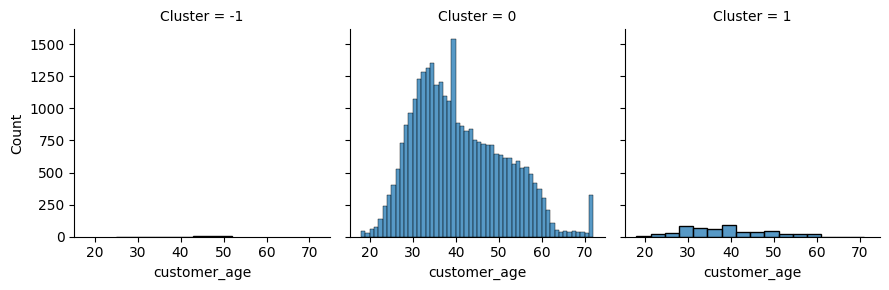

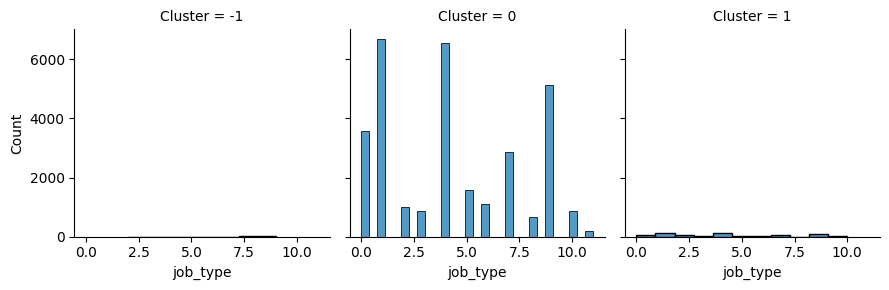

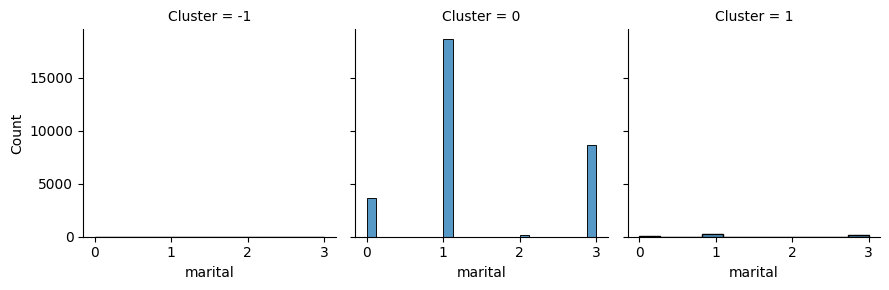

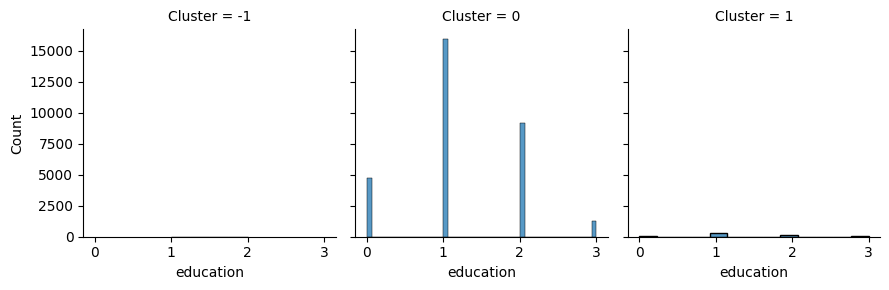

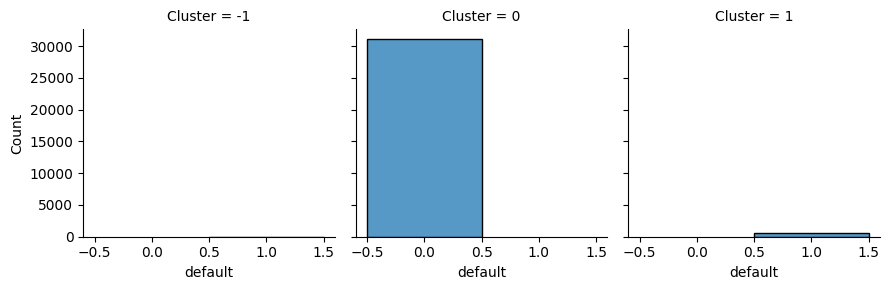

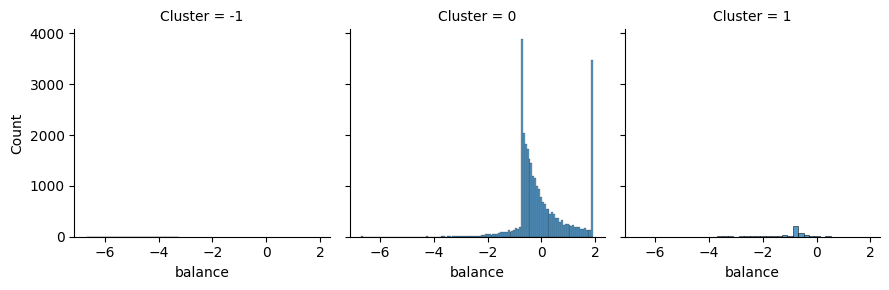

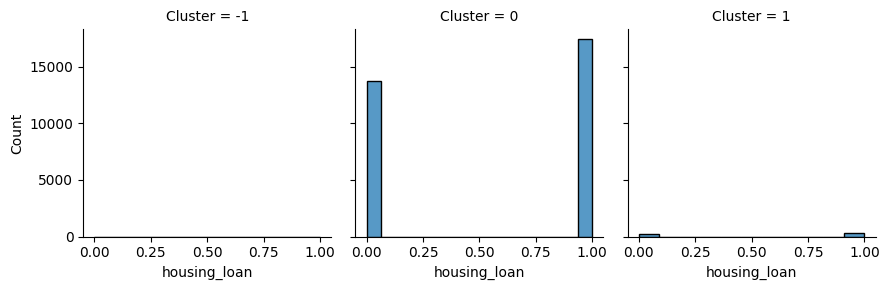

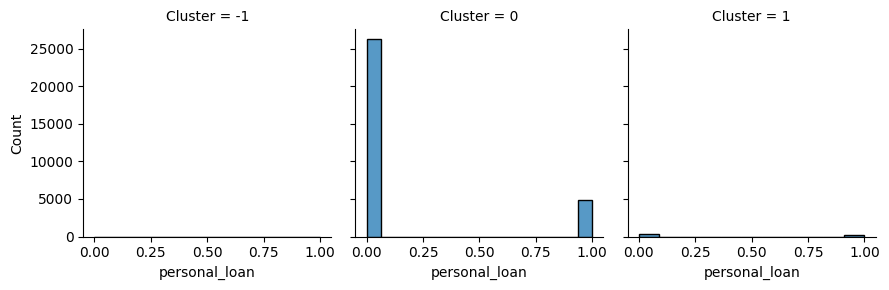

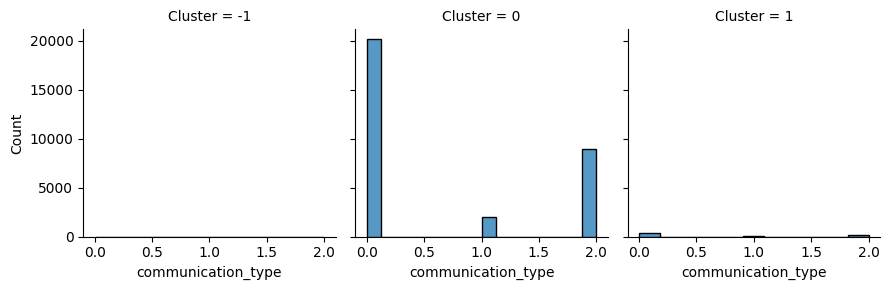

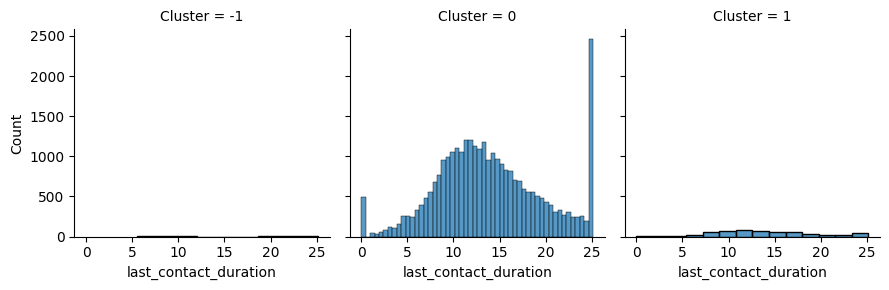

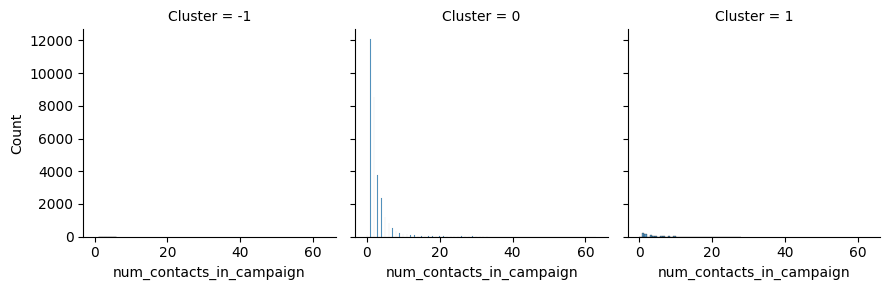

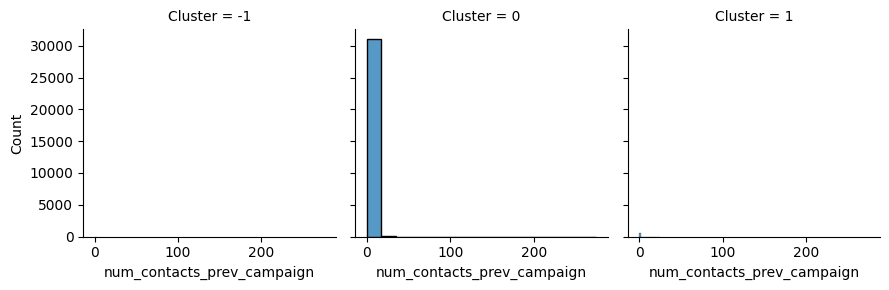

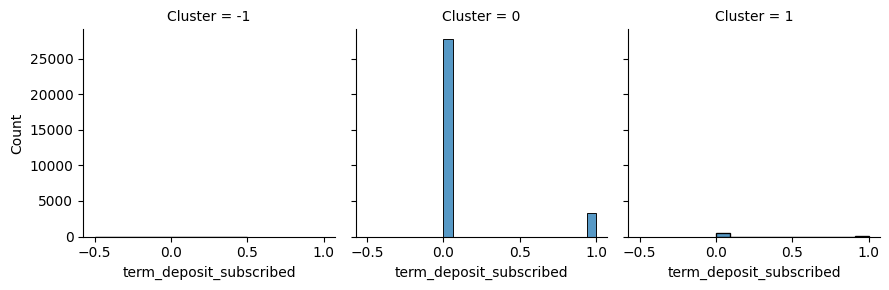

In [366]:
for i in df_new.drop(['Cluster'],axis=1):
  grid=sns.FacetGrid(df_new,col='Cluster')
  grid.map(sns.histplot,i)
plt.show()


# **Predicting the cluster**

## **prediction**

### **Data loading**

In [367]:
#loading train data
df=pd.read_csv("/content/Test.csv")

# **2.Data Exploration**

In [368]:
#Displying Dataframe
df.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success


In [369]:
#Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13564 non-null  object 
 1   customer_age                      13294 non-null  float64
 2   job_type                          13564 non-null  object 
 3   marital                           13483 non-null  object 
 4   education                         13564 non-null  object 
 5   default                           13564 non-null  object 
 6   balance                           13383 non-null  float64
 7   housing_loan                      13564 non-null  object 
 8   personal_loan                     13490 non-null  object 
 9   communication_type                13564 non-null  object 
 10  day_of_month                      13564 non-null  int64  
 11  month                             13564 non-null  object 
 12  last

There are 13564 records of data under 17 columns.There are categorical as well as numerical columns with some missing values.

In [370]:
#The data types value_counts
df.dtypes.value_counts()

object     10
float64     5
int64       2
Name: count, dtype: int64

In [371]:
#Statistical summary of numeric data
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign
count,13294.000000,13383.000000,13564.000000,13442.000000,13519.000000,2441.000000,13564.000000
mean,40.450429,1341.405514,15.778089,261.171031,2.730971,223.582958,0.553966
std,10.747881,2839.670990,8.321562,261.195560,2.941338,116.196526,1.762402
min,18.000000,-6849.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,32.000000,70.500000,8.000000,102.000000,1.000000,131.000000,0.000000
50%,39.000000,447.000000,16.000000,182.000000,2.000000,194.000000,0.000000
75%,48.000000,1466.000000,21.000000,325.000000,3.000000,323.000000,0.000000
max,94.000000,71187.000000,31.000000,3863.000000,50.000000,842.000000,38.000000


# **Observations:**
customer_age:
Ranges from 18 to 94,has a mean value of 40.

balance:
Ranges from -6849to 71187, has a mean value of 1341.40

Last contact duration:
Ranges from 0-3863 may be in seconds, has a mean value of 261.17

num_contacts_in_campaign:
Ranges from 1-50

days_since_prev_campaign_contact:
Ranges from 1-842

num_contacts_prev_campaign:
It is expressed as a float value, but it is an integer value.Need to change the data type to int.



In [372]:
#summary of the categorical columns
df.describe(include='object')

,id,job_type,marital,education,default,housing_loan,personal_loan,communication_type,month,prev_campaign_outcome
count,13564,13564,13483,13564,13564,13564,13490,13564,13564,13564
unique,13564,12,3,4,2,2,2,3,12,4
top,id_17231,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,1,2916,8123,6955,13302,7430,11314,8805,4081,11126


In [373]:
#Missing values identification
df.isna().sum()

id                                      0
customer_age                          270
job_type                                0
marital                                81
education                               0
default                                 0
balance                               181
housing_loan                            0
personal_loan                          74
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 122
num_contacts_in_campaign               45
days_since_prev_campaign_contact    11123
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
dtype: int64

In [374]:
#Defining empty lists to identify which columns to be handled for missing values and encode
col_to_le=[]
col_to_miss=[]

In [375]:
#Defining a function for the univariate analysis of each column,
#ploting histograms for discrete numerical column, kdeplot for continuous numeric and
#countplot for categorical column , also identifying number of  missing values for each column
def eda(x,df,miss,le):
  if df[x].dtype=='object':
    sns.countplot(df[x])
    plt.show()
    print(f"value_counts of {x}",df[x].value_counts())
    le.append(x)
  elif df[x].dtype=='int64':
    sns.histplot(df[x])
    plt.show()
    print(f"value_counts of {x}",df[x].value_counts())
  else:
    sns.kdeplot(df[x])
    plt.show()



  print(f"missing values of {x}",df[x].isna().sum())
  if df[x].isna().sum()>0:
    miss.append(x)


# **Understanding column data**





In [376]:
df.drop('id',axis=1,inplace=True)

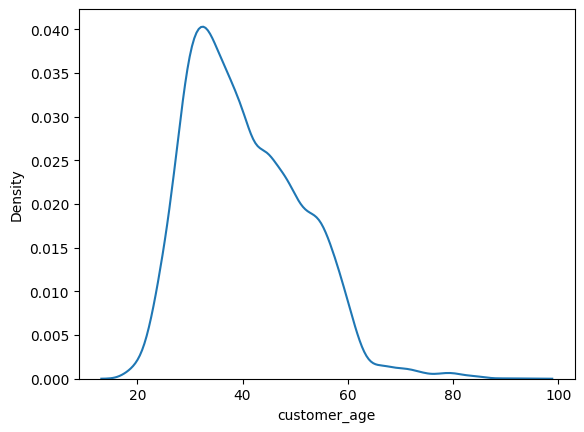

missing values of customer_age 270


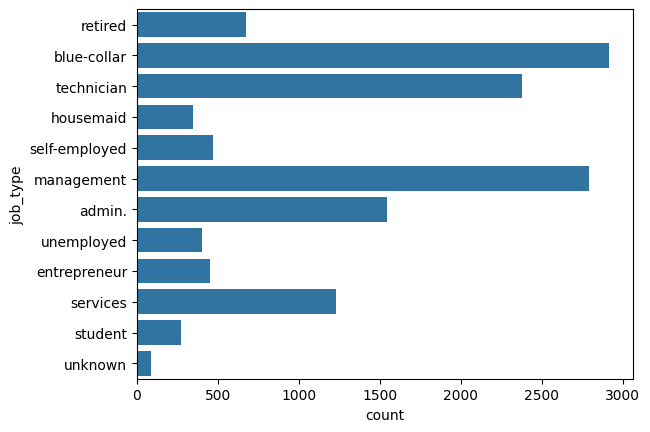

value_counts of job_type job_type
blue-collar      2916
management       2792
technician       2377
admin.           1544
services         1231
retired           673
self-employed     468
entrepreneur      450
unemployed        402
housemaid         347
student           275
unknown            89
Name: count, dtype: int64
missing values of job_type 0


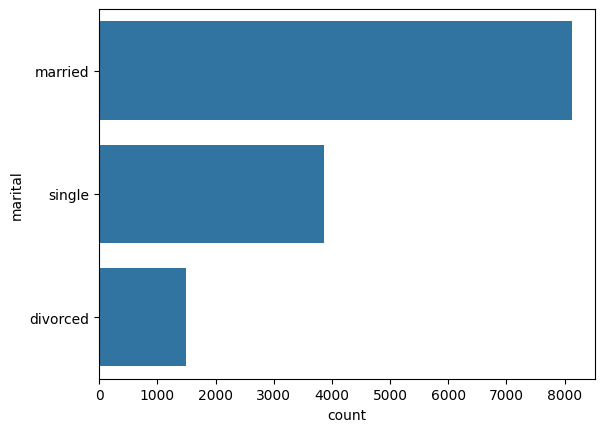

value_counts of marital marital
married     8123
single      3869
divorced    1491
Name: count, dtype: int64
missing values of marital 81


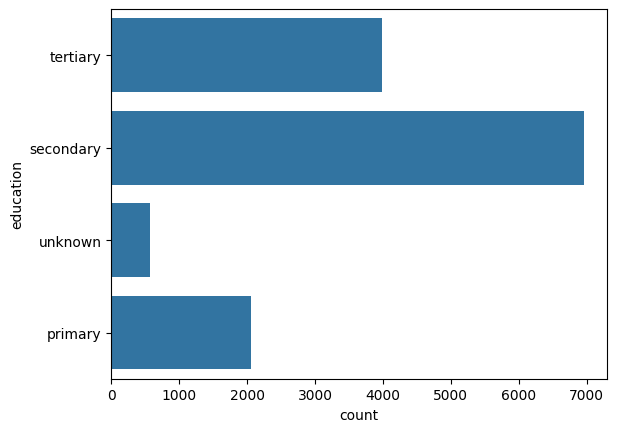

value_counts of education education
secondary    6955
tertiary     3980
primary      2064
unknown       565
Name: count, dtype: int64
missing values of education 0


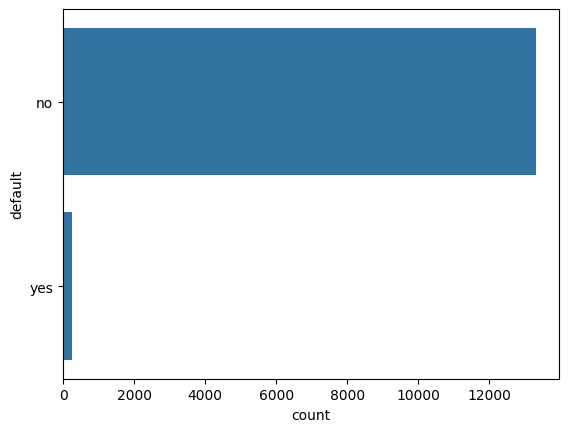

value_counts of default default
no     13302
yes      262
Name: count, dtype: int64
missing values of default 0


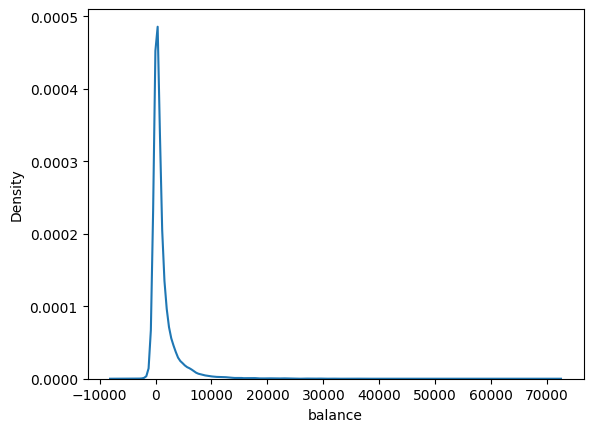

missing values of balance 181


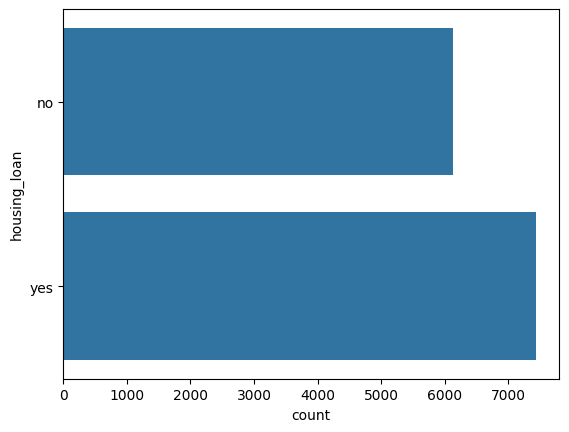

value_counts of housing_loan housing_loan
yes    7430
no     6134
Name: count, dtype: int64
missing values of housing_loan 0


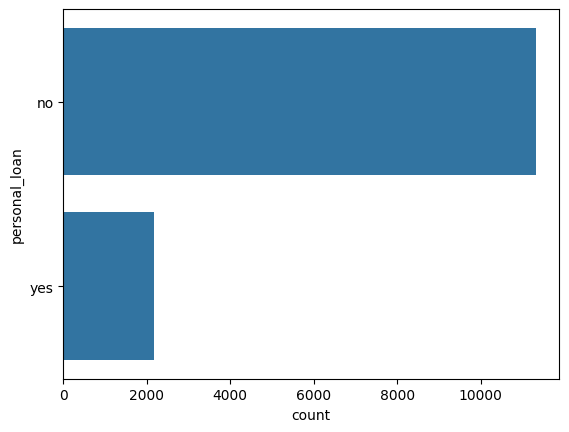

value_counts of personal_loan personal_loan
no     11314
yes     2176
Name: count, dtype: int64
missing values of personal_loan 74


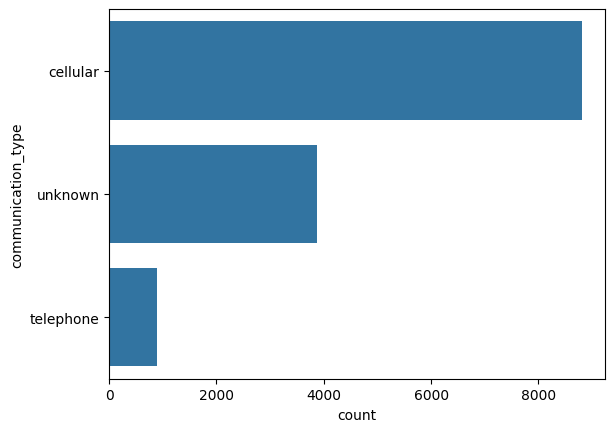

value_counts of communication_type communication_type
cellular     8805
unknown      3869
telephone     890
Name: count, dtype: int64
missing values of communication_type 0


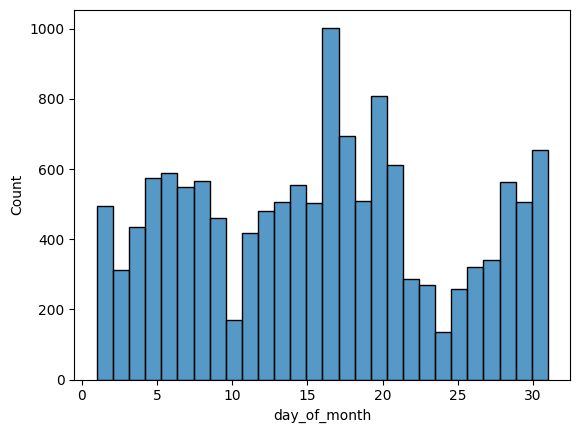

value_counts of day_of_month day_of_month
20    808
18    693
21    612
6     590
5     574
17    573
8     566
28    562
14    554
7     548
19    508
13    505
29    505
15    502
12    481
30    479
9     460
4     436
16    430
11    417
2     408
27    341
26    320
3     312
22    287
23    269
25    257
31    174
10    171
24    135
1      87
Name: count, dtype: int64
missing values of day_of_month 0


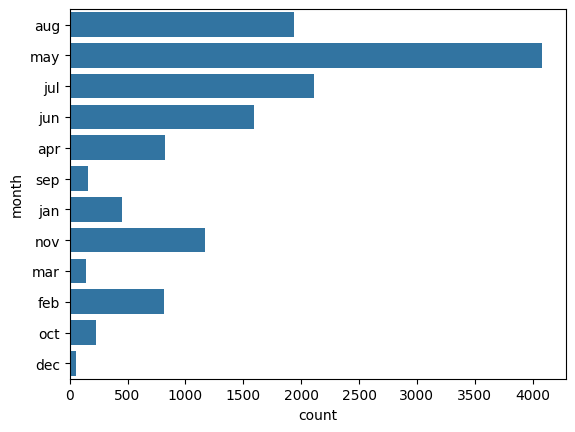

value_counts of month month
may    4081
jul    2109
aug    1939
jun    1595
nov    1169
apr     821
feb     813
jan     450
oct     228
sep     162
mar     139
dec      58
Name: count, dtype: int64
missing values of month 0


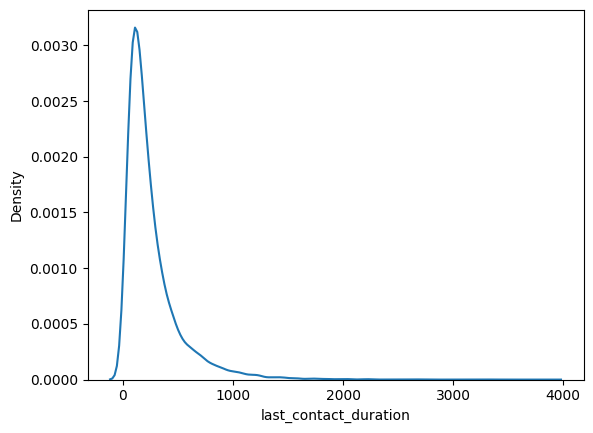

missing values of last_contact_duration 122


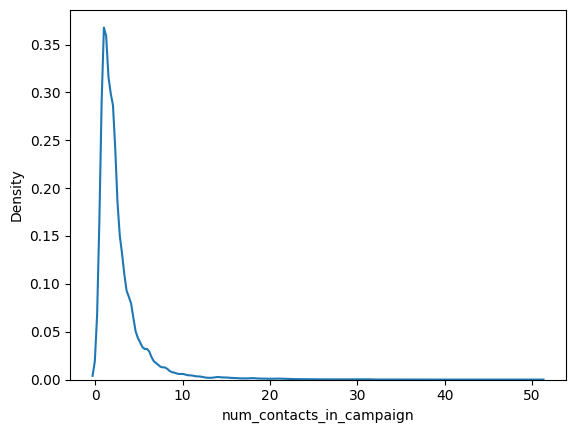

missing values of num_contacts_in_campaign 45


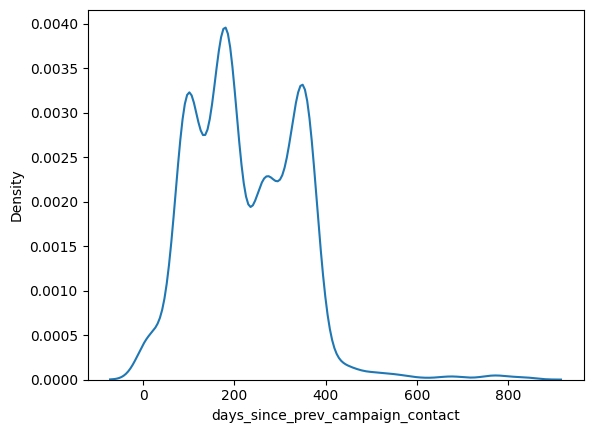

missing values of days_since_prev_campaign_contact 11123


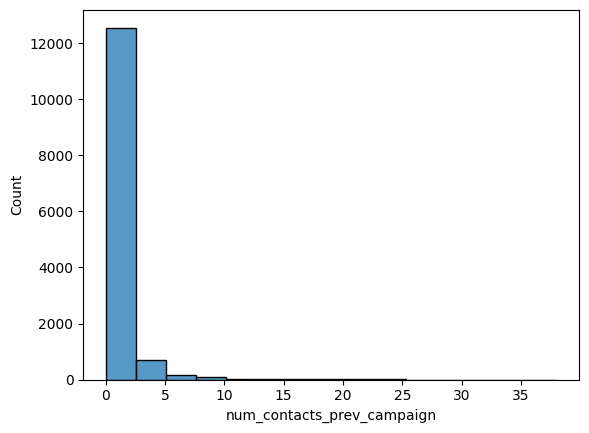

value_counts of num_contacts_prev_campaign num_contacts_prev_campaign
0     11123
1       834
2       599
3       336
4       214
5       148
6        89
7        57
8        38
9        30
11       19
10       19
12       10
13       10
16        7
15        6
19        4
14        4
17        4
23        2
21        2
22        1
26        1
29        1
20        1
28        1
24        1
27        1
18        1
38        1
Name: count, dtype: int64
missing values of num_contacts_prev_campaign 0


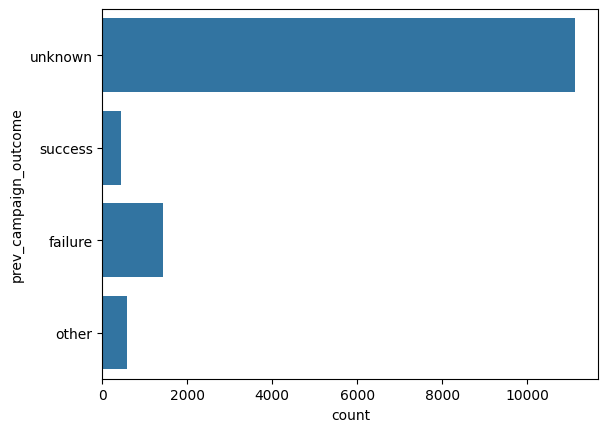

value_counts of prev_campaign_outcome prev_campaign_outcome
unknown    11126
failure     1429
other        568
success      441
Name: count, dtype: int64
missing values of prev_campaign_outcome 0


In [377]:
for i in df.columns:
  eda(i,df,col_to_miss,col_to_le)

In [378]:
#To check for duplicated records of data
df[df.duplicated(keep='first')]

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome


# **4.Data Cleaning**

### **Handling missing Values**

In [379]:
#Columns t handle missing values
col_to_miss

['customer_age',
 'marital',
 'balance',
 'personal_loan',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact']

In [380]:
for i in col_to_miss:
  if df[i].isna().sum()>(0.8*df.shape[0]):
    df.drop(i,axis=1,inplace=True)
    print(f"column {i} has more than 80% missing values and hence it is droppped")
    col_to_miss.remove(i)



column days_since_prev_campaign_contact has more than 80% missing values and hence it is droppped


In [381]:
#Filling na value with median of the columns
df['customer_age'].fillna(df['customer_age'].median(),inplace=True)

In [382]:
#Marital na values are filled by constant = missing
df['marital'].fillna('missing',inplace=True)

In [383]:
#Filling na values with zero
df['balance']=df['balance'].fillna(0)

In [384]:
#Filling na values with constant=no
df['personal_loan'].fillna('no',inplace=True)

In [385]:
#last_contact_duration
df['last_contact_duration'].fillna(0,inplace=True)

In [386]:
#filling na values with  0
df['num_contacts_in_campaign'].fillna(0,inplace=True)

In [387]:
df['num_contacts_in_campaign'] = df['num_contacts_in_campaign'].round().astype(int)


In [388]:
df.isna().sum()

customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
dtype: int64

### **Outliers-Handling**

<Axes: >

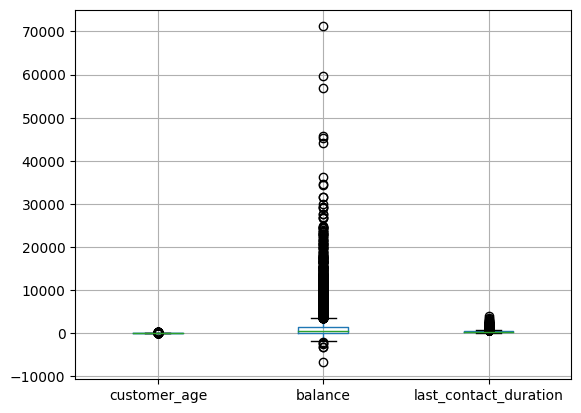

In [389]:
#Plotting boxplots to identify the outliers
df.select_dtypes(include='float').boxplot()

In [390]:
#Identifying ouliers in each column of continuous numeric data
for i in df.select_dtypes(include='float').columns:
  outlier=[]
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  for j in df[i]:
    if(j< Q1-1.5* IQR) | (j> Q3+1.5* IQR):
      outlier.append(j)

  print(f"outlier for column {i}are ",outlier)
  #Outlier is not handled as it will remove the column 'num_contacts_prev_campaign'


  df[i] = np.clip(df[i], Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
  outlier_n=[]
  for j in df[i]:
    if(j< Q1-1.5* IQR) | (j> Q3+1.5* IQR):
      outlier_n.append(j)
  print(f"outlier for column {i}are ",outlier_n)



outlier for column customer_ageare  [79.0, 73.0, 74.0, 73.0, 78.0, 81.0, 80.0, 80.0, 73.0, 81.0, 81.0, 79.0, 73.0, 79.0, 80.0, 75.0, 73.0, 79.0, 85.0, 74.0, 73.0, 77.0, 74.0, 75.0, 85.0, 75.0, 85.0, 78.0, 73.0, 82.0, 76.0, 81.0, 84.0, 75.0, 83.0, 76.0, 80.0, 81.0, 76.0, 75.0, 74.0, 83.0, 80.0, 79.0, 84.0, 82.0, 94.0, 80.0, 81.0, 76.0, 73.0, 79.0, 82.0, 79.0, 84.0, 78.0, 80.0, 78.0, 74.0, 78.0, 73.0, 73.0, 82.0, 79.0, 75.0, 87.0, 78.0, 73.0, 79.0, 81.0, 81.0, 81.0, 77.0, 91.0, 80.0, 77.0, 78.0, 74.0, 84.0, 84.0, 79.0, 74.0, 83.0, 77.0, 74.0, 79.0, 78.0, 77.0, 74.0, 77.0, 77.0, 74.0, 74.0, 84.0, 80.0, 85.0, 90.0, 86.0, 78.0, 75.0]
outlier for column customer_ageare  []
outlier for column balanceare  [7136.0, 6023.0, 3815.0, 5240.0, 10758.0, 6731.0, 4408.0, 19099.0, 5769.0, 6824.0, 3930.0, 5087.0, 5540.0, 6133.0, 16398.0, 5005.0, 7388.0, 6487.0, 5132.0, 4394.0, 4595.0, 8898.0, 3706.0, 4054.0, 5339.0, 4146.0, 3514.0, 5612.0, 7387.0, 3972.0, 6991.0, 6202.0, 7036.0, 9727.0, 4081.0, 15299.0, 

In [391]:
#Creating a copy of data frame and further analysis is done on df_n
df_n=df.copy()

In [392]:
df_n.drop(['month','prev_campaign_outcome','day_of_month'],axis=1,inplace=True)

Skewness Treatment

customer_age
skewnwss for column customer_age is 0.5559919900107957


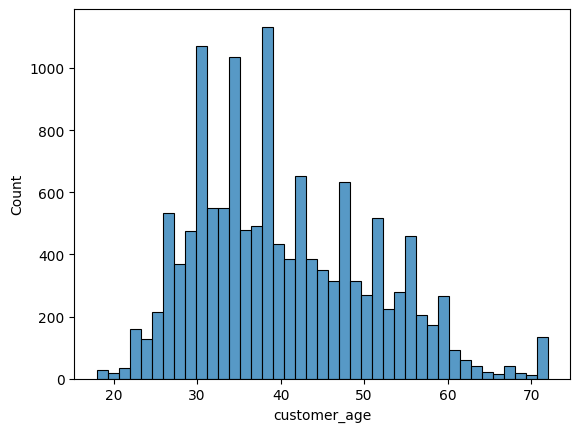

balance
skewnwss for column balance is 1.1103914685709029


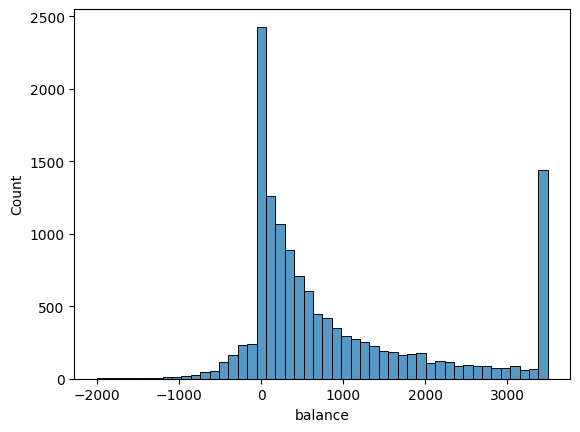

last_contact_duration
skewnwss for column last_contact_duration is 1.0352280275667025


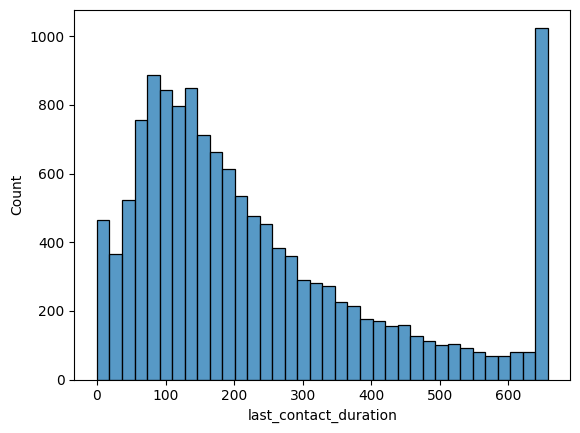

In [393]:
#plotting the histogram before log transformation
for i in df_n.select_dtypes(include='float').columns:
  print(i)
  print(f"skewnwss for column {i} is {df_n[i].skew()}")
  sns.histplot(df_n[i])
  plt.show()


In [394]:
from sklearn.preprocessing import PowerTransformer

In [395]:
pt = PowerTransformer(method='yeo-johnson')


customer_age
skewnwss for column customer_age is 0.5559919900107957


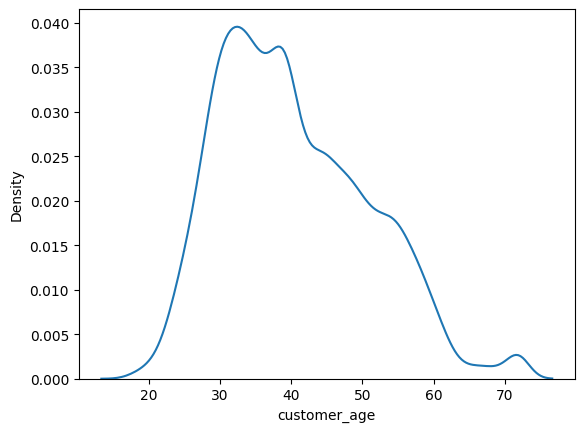

balance
skewnwss for column balance is 0.12704510007486933


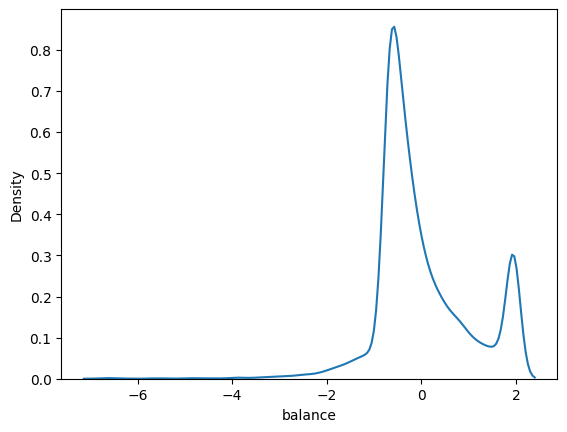

last_contact_duration
skewnwss for column last_contact_duration is 0.24823804720749962


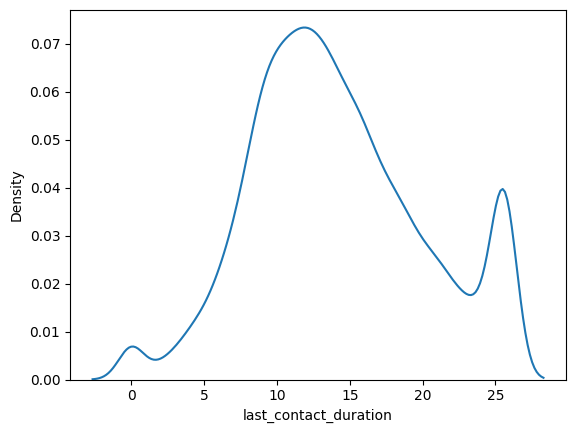

In [396]:
#plotting kdeplot after the sqrt transformation applied

pd.set_option('display.max_rows', None)
for i in df_n.select_dtypes(include='float').columns:
  print(i)
  if abs(df_n[i].skew())>0.8 and (i!='balance'):
    df_n[i]=np.sqrt(df_n[i])
  if abs(df_n[i].skew())>0.8 and (i=='balance'):
    df_n[i] = pt.fit_transform(df_n[i].values.reshape(-1, 1))
  print(f"skewnwss for column {i} is {df_n[i].skew()}")
  sns.kdeplot(df_n[i])
  plt.show()

# **Label encoding**

In [397]:
col_to_le

['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

In [398]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ['default', 'housing_loan', 'personal_loan']:
 df_n[i]=le.fit_transform(df_n[i])


In [399]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in ['job_type', 'marital', 'education','communication_type']:
  df_n[i]=oe.fit_transform(df_n[i].values.reshape(-1,1))

In [400]:
for i in ['job_type', 'marital', 'education','communication_type']:
  df_n[i]=df_n[i].astype(int)

In [401]:
#Checking data types to see the encoding
df_n.dtypes

customer_age                  float64
job_type                        int64
marital                         int64
education                       int64
default                         int64
balance                       float64
housing_loan                    int64
personal_loan                   int64
communication_type              int64
last_contact_duration         float64
num_contacts_in_campaign        int64
num_contacts_prev_campaign      int64
dtype: object

In [402]:
df_n.isna().sum()

customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
dtype: int64

In [403]:
import joblib
from joblib import dump


In [404]:
joblib.dump(df_n,'test_df_n.joblib')

['test_df_n.joblib']

In [405]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = scaler.fit_transform(df_n)


In [406]:
joblib.dump(df_std,'test_df_std.joblib')

['test_df_std.joblib']

# **PCA**

In [407]:
test_df_std=joblib.load('/content/test_df_std.joblib')


In [408]:
test_df_n=joblib.load('/content/test_df_n.joblib')

In [409]:
test_df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_age                13564 non-null  float64
 1   job_type                    13564 non-null  int64  
 2   marital                     13564 non-null  int64  
 3   education                   13564 non-null  int64  
 4   default                     13564 non-null  int64  
 5   balance                     13564 non-null  float64
 6   housing_loan                13564 non-null  int64  
 7   personal_loan               13564 non-null  int64  
 8   communication_type          13564 non-null  int64  
 9   last_contact_duration       13564 non-null  float64
 10  num_contacts_in_campaign    13564 non-null  int64  
 11  num_contacts_prev_campaign  13564 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.2 MB


In [410]:
#Convering to a data frame
test_df_std = pd.DataFrame(test_df_std, columns=test_df_n.columns)

In [411]:
test_df_std.drop([
        'num_contacts_in_campaign',
       'num_contacts_prev_campaign'],axis=1,inplace=True)

In [412]:
#test_df_std.drop('term_deposit_subscribed',axis=1,inplace=True)

In [413]:
test_df_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_age           13564 non-null  float64
 1   job_type               13564 non-null  float64
 2   marital                13564 non-null  float64
 3   education              13564 non-null  float64
 4   default                13564 non-null  float64
 5   balance                13564 non-null  float64
 6   housing_loan           13564 non-null  float64
 7   personal_loan          13564 non-null  float64
 8   communication_type     13564 non-null  float64
 9   last_contact_duration  13564 non-null  float64
dtypes: float64(10)
memory usage: 1.0 MB


In [414]:
from sklearn.decomposition import PCA

In [415]:
# Load the PCA model from the file
with open('pca_model.pkl', 'rb') as file:
    loaded_pca = pickle.load(file)

# Use the loaded model for transformation
test_scores_pca = loaded_pca.transform(test_df_std)


# **DBSCAN after PCA**

In [416]:
from sklearn.cluster import DBSCAN

In [417]:
test_scores_pca = pd.DataFrame(test_scores_pca)

In [418]:
test_scores_pca.head()

,0,1,2,3,4,5
0,-0.271014,-2.676521,-0.125000,0.807994,-0.347288,0.287395
1,1.421054,1.646281,-0.662908,0.383513,-1.221888,1.188713
2,-0.594385,-1.476857,1.102558,0.183901,0.419937,-0.332315
3,0.716654,-1.752024,-1.028929,2.121387,0.257998,0.192983
4,-1.182232,-2.479809,-0.036478,0.372151,-0.295748,0.578987


In [419]:
with open('/content/db_model.pkl', 'rb') as file:
    db = pickle.load(file)

In [420]:
# Convert all column names to strings
test_scores_pca.columns = test_scores_pca.columns.astype(str)
# Initialize DBSCAN with chosen parameters
#eps = 3  # Example value, adjust as needed
#min_samples = 5  # Example value, adjust as needed
# Get cluster assignments directly
labels = db.fit_predict(test_scores_pca)

# Add cluster labels to your original data
test_scores_pca['Cluster'] = labels

In [421]:
test_scores_pca['Cluster'].value_counts()

Cluster
 0    13301
 1      255
-1        8
Name: count, dtype: int64

In [422]:
test_scores_pca_n=pd.concat([test_df_n,test_scores_pca],axis=1)

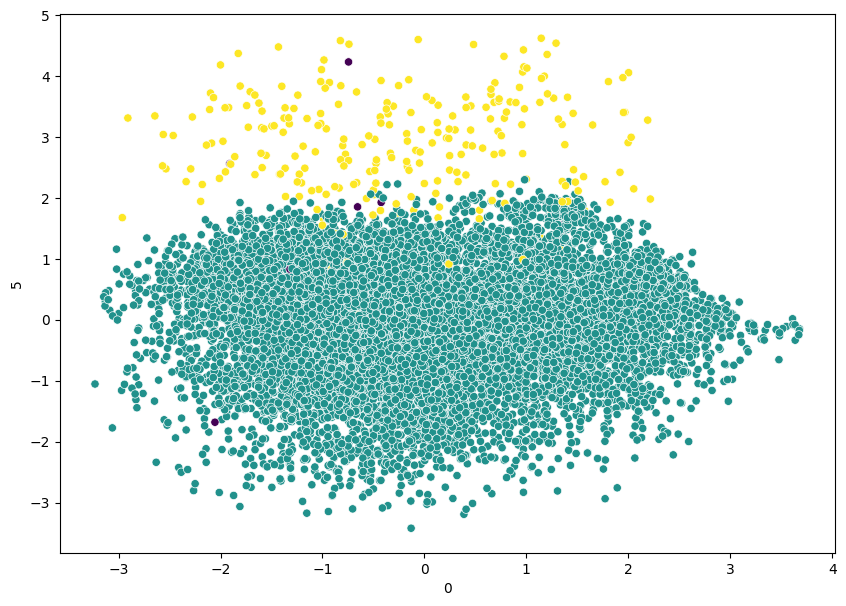

In [431]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=test_scores_pca_n.iloc[:, 12], y=test_scores_pca_n.iloc[:, 17], c=labels, cmap='viridis')
plt.show()

In [424]:
print(test_scores_pca_n.groupby('Cluster').median())

         customer_age  job_type  marital  education  default   balance  \
Cluster                                                                  
-1               48.5       4.0      1.0        2.0      1.0 -6.687780   
 0               39.0       4.0      1.0        1.0      0.0 -0.281866   
 1               39.0       4.0      1.0        1.0      1.0 -0.711339   

         housing_loan  personal_loan  communication_type  \
Cluster                                                    
-1                1.0            1.0                 2.0   
 0                1.0            0.0                 0.0   
 1                1.0            0.0                 0.0   

         last_contact_duration  num_contacts_in_campaign  \
Cluster                                                    
-1                   11.869559                       1.5   
 0                   13.416408                       2.0   
 1                   12.922848                       2.0   

         num_contacts_prev_

In [425]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

silhouette_avg = silhouette_score(test_scores_pca, labels)
db_score = davies_bouldin_score(test_scores_pca, labels)
ch_score = calinski_harabasz_score(test_scores_pca, labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Score: {db_score}')
print(f'Calinski-Harabasz Score: {ch_score}')

Silhouette Score: 0.5604635319218501
Davies-Bouldin Score: 1.2424471016893575
Calinski-Harabasz Score: 1006.7912903648801


In [426]:
test_df_new=pd.concat([test_df_n,test_scores_pca_n['Cluster']],axis=1)

In [427]:
test_df_new.groupby('Cluster').median()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
Cluster,,,,,,,,,,,,
-1,48.5,4.0,1.0,2.0,1.0,-6.687780,1.0,1.0,2.0,11.869559,1.5,0.0
0,39.0,4.0,1.0,1.0,0.0,-0.281866,1.0,0.0,0.0,13.416408,2.0,0.0
1,39.0,4.0,1.0,1.0,1.0,-0.711339,1.0,0.0,0.0,12.922848,2.0,0.0


In [428]:
test_df_new.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,Cluster
0,55.0,5,1,2,0,1.947298,0,0,0,9.486833,2,0,0
1,24.0,1,3,1,0,-0.519266,1,0,0,7.937254,2,0,0
2,46.0,9,0,1,0,-0.552621,0,0,0,14.422205,1,0,0
3,56.0,3,3,3,0,1.947298,0,0,2,5.830952,1,0,0
4,62.0,5,1,1,0,1.544854,0,0,0,11.269428,1,1,0


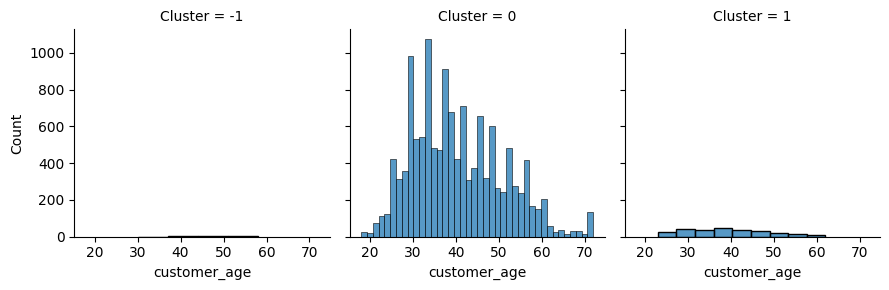

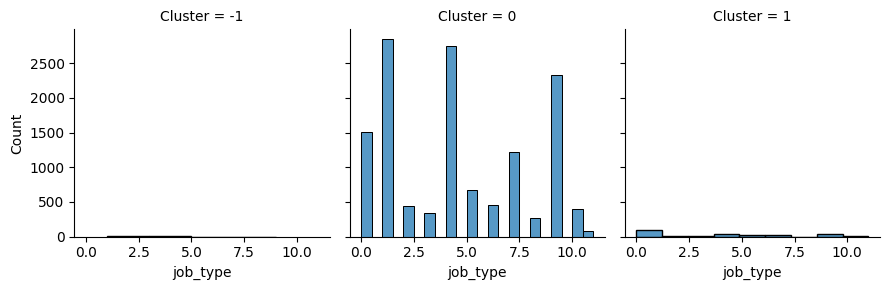

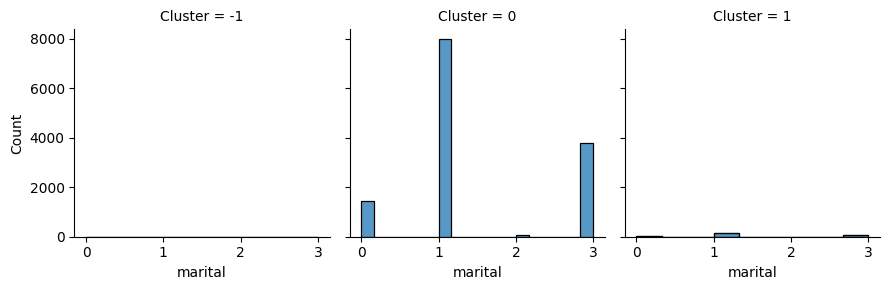

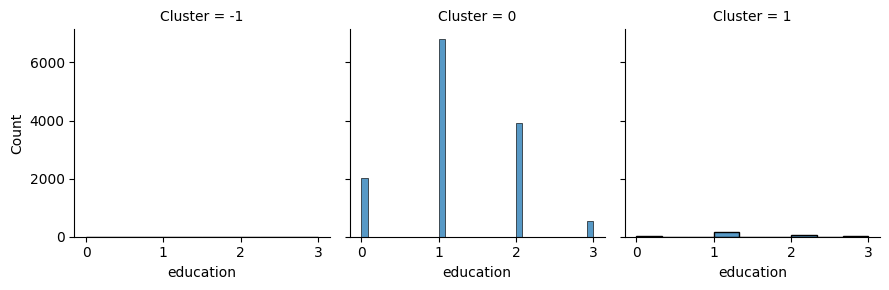

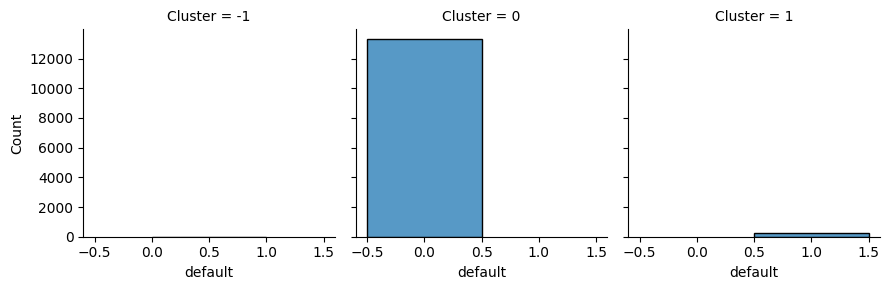

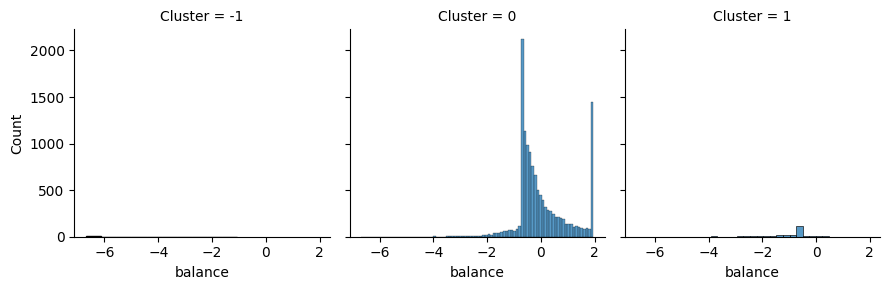

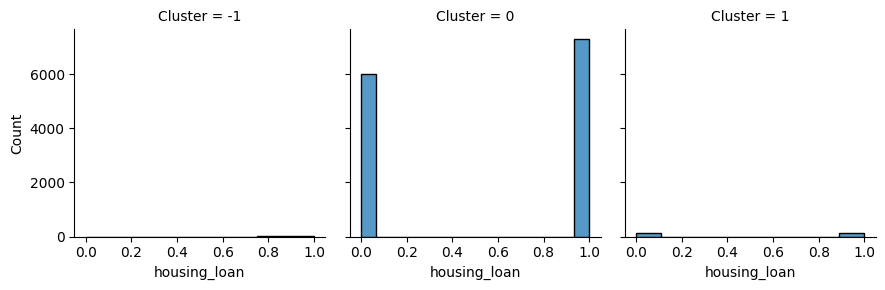

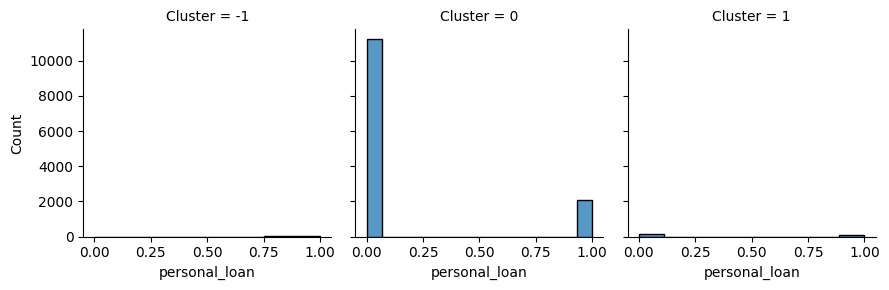

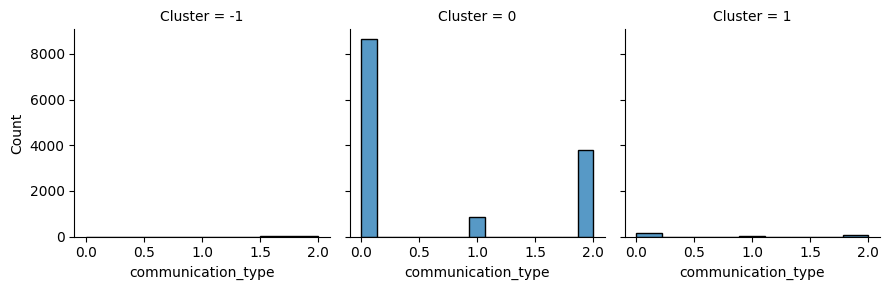

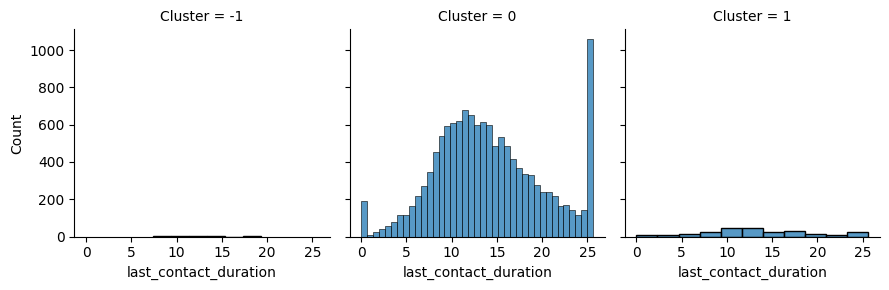

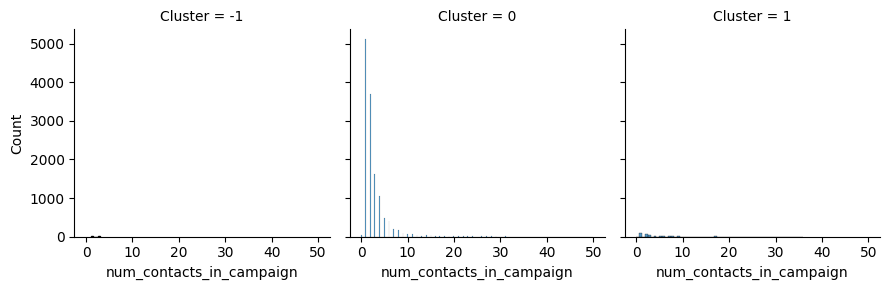

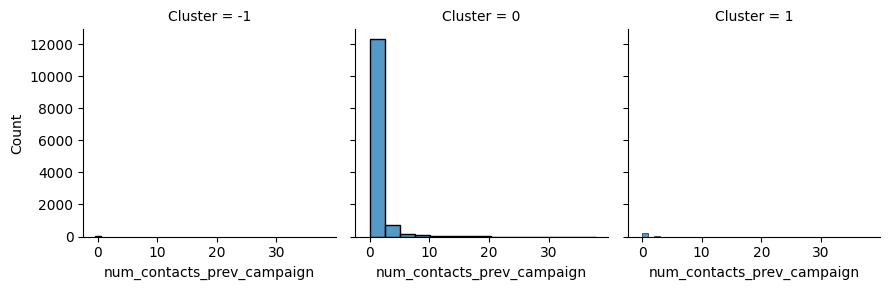

In [429]:
for i in test_df_new.drop(['Cluster'],axis=1):
  grid=sns.FacetGrid(test_df_new,col='Cluster')
  grid.map(sns.histplot,i)
plt.show()

<Axes: xlabel='Cluster', ylabel='Count'>

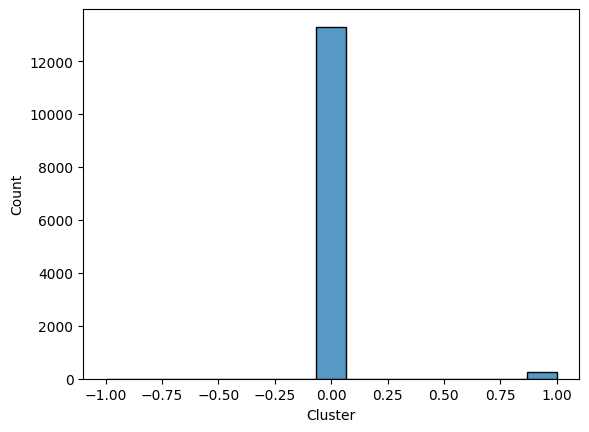

In [430]:
sns.histplot(test_df_new['Cluster'])